# Phân Tích Dữ Liệu: Đánh Giá Nguy Cơ Bệnh Tim Dựa Trên AI  

* **Nhóm:** 3  

## **Mục lục**<a is='Contents'></a>  
* [Giới thiệu](#Introduction)  
* [Tập dữ liệu](#Dataset)  
* [Thiết lập và Chuẩn bị](#Setup_and_preliminaries)  
  * [Nhập thư viện](#Import_libraries)  
  * [Các hàm cần thiết](#Necessary_Functions)  
* [Nhập tập dữ liệu](#Importing_dataset)  
* [Xác thực tập dữ liệu](#Validating_the_dataset)  
* [Các đặc trưng liên quan đến bệnh tim](#Heart_Disease_related_features)  
* [Chuyển đổi kiểu dữ liệu của các đặc trưng](#Converting_features_data_type)  
* [Phân tích phân phối của các đặc trưng phân loại theo biến mục tiêu](#Analyzing_categorical_feature_distributions_against_a_target_variable)  
* [Phân tích biểu đồ phân phối của các đặc trưng phân loại](#Categorical_feature_distributions_Chart_Interpretations)  
  * [Bệnh tim: Biến mục tiêu](#Heart_Disease_Target_Variable)  
  * [Bệnh tim theo giới tính](#Heart_Disease_vs_Gender)  
  * [Bệnh tim theo chủng tộc](#Heart_Disease_vs_Race)  
  * [Bệnh tim theo tình trạng sức khỏe tổng quát](#Heart_Disease_vs_General_Health)  
  * [Bệnh tim theo nhà cung cấp dịch vụ y tế](#Heart_Disease_vs_Health_Care_Provider)  
  * [Bệnh tim theo tình trạng có bác sĩ riêng](#Heart_Disease_vs_Doctor_availability)  
  * [Bệnh tim theo thói quen kiểm tra sức khỏe định kỳ](#Heart_Disease_vs_routine_checkup)  
  * [Bệnh tim theo tiền sử đau tim](#Heart_Disease_vs_Heart_Attack)  
  * [Bệnh tim theo tiền sử đột quỵ](#Heart_Disease_vs_Stroke)  
  * [Bệnh tim theo bệnh thận](#Heart_Disease_vs_Kidney_Disease)  
  * [Bệnh tim theo bệnh tiểu đường](#Heart_Disease_vs_Diabetes)  
  * [Bệnh tim theo chỉ số BMI](#Heart_Disease_vs_BMI)  
  * [Bệnh tim theo khó khăn khi đi bộ hoặc leo cầu thang](#Heart_Disease_vs_Difficulty_Walking_or_Climbing)  
  * [Bệnh tim theo tình trạng sức khỏe thể chất](#Heart_Disease_vs_Physical_Health_Status)  
  * [Bệnh tim theo tình trạng sức khỏe tinh thần](#Heart_Disease_vs_Mental_Health_Status)  
  * [Bệnh tim theo bệnh hen suyễn](#Heart_Disease_vs_Asthma)  
  * [Bệnh tim theo tình trạng hút thuốc](#Heart_Disease_vs_Smoking_Status)  
  * [Bệnh tim theo tình trạng uống rượu quá độ](#Heart_Disease_vs_Binge_Drinking_Status)  
  * [Bệnh tim theo thói quen tập thể dục](#Heart_Disease_vs_Exercise_Status)  
  * [Bệnh tim theo nhóm tuổi](#Heart_Disease_vs_Age_Category)  
  * [Bệnh tim theo nhóm giấc ngủ](#Heart_Disease_vs_Sleep_Category)  
  * [Bệnh tim theo tình trạng uống rượu](#Heart_Disease_vs_Drinking_Status)  
* [Tương quan: Bệnh tim và tất cả các đặc trưng](#Correlation_Heart_Disease_vs_all_features)  
  * [Lựa chọn đặc trưng](#Features_Selection)  
  * [Mã hóa dữ liệu phân loại bằng Catboost](#Categorical_Encoding_with_Catboost)  
  * [Thông tin tương hỗ - Sức mạnh dự đoán](#Mutual_Information_Prediction_Power)  
    * [Diễn giải điểm số thông tin tương hỗ](#Interpretation_of_Mutual_Information_Scores)  
  * [Tương quan Pearson](#Pearson_Correlation)  
    * [Diễn giải đa cộng tuyến](#Collinearity_Interpretation)  
    * [Diễn giải biến mục tiêu](#Target_Variable_Interpretation)  
  * [So sánh giữa tương quan Pearson và thông tin tương hỗ](#Comparison_Between_Pearson_Correlation_and_Mutual_Information)  


## **Giới Thiệu**<a id='Introduction'></a>  
[Danh Mục Nội Dung](#Contents)  

Chào mừng bạn đến với sổ tay Phân Tích Dữ Liệu Khám Phá (EDA) cho dự án dự đoán bệnh tim. Đây là một bước quan trọng trong quy trình khoa học dữ liệu, nhằm khám phá những hiểu biết và mô hình tiềm năng trong tập dữ liệu, từ đó hỗ trợ quá trình xây dựng mô hình dự đoán.  

Trong sổ tay này, chúng ta sẽ:  

* **Xác thực Dữ Liệu:** Đảm bảo dữ liệu sạch, nhất quán và sẵn sàng cho phân tích.  
* **Khám Phá Phân Bố Đặc Trưng:** Phân tích cách các đặc trưng liên quan đến bệnh tim được phân bố.  
* **Chuyển Đổi Dữ Liệu Phân Loại:** Biến đổi các đặc trưng phân loại thành dạng số bằng phương pháp mã hóa CatBoost để cải thiện khả năng phân tích và mô hình hóa.  
* **Phân Tích Tương Quan:** Xác định mối quan hệ tuyến tính và phi tuyến tính giữa các đặc trưng và biến mục tiêu (bệnh tim) bằng hệ số tương quan Pearson và thông tin tương hỗ.  
* **Lựa Chọn Đặc Trưng:** Xác định và chọn lọc các đặc trưng quan trọng nhất có khả năng dự đoán bệnh tim cao.  

Những bước này sẽ giúp chúng ta hiểu rõ hơn về dữ liệu, phát hiện các mối quan hệ quan trọng và chuẩn bị dữ liệu để xây dựng các mô hình dự đoán mạnh mẽ.

## **Tập Dữ Liệu**<a id='Dataset'></a>  
[Danh Mục Nội Dung](#Contents)  

Tập dữ liệu được sử dụng trong sổ tay Phân Tích Dữ Liệu Khám Phá (EDA) này là kết quả của một quá trình xử lý và tiền xử lý dữ liệu kỹ lưỡng. Xử lý dữ liệu là một bước quan trọng trong quy trình khoa học dữ liệu, giúp chuyển đổi và chuẩn bị dữ liệu thô thành định dạng phù hợp hơn cho phân tích. Các nhiệm vụ chính được thực hiện trong quá trình này bao gồm:  

* Xử lý dữ liệu bị thiếu  
* Ánh xạ dữ liệu  
* Làm sạch dữ liệu  
* Kỹ thuật đặc trưng  

Những bước này giúp đảm bảo tập dữ liệu sẵn sàng cho phân tích và mô hình hóa, tạo tiền đề để xây dựng các mô hình dự đoán bệnh tim chính xác và đáng tin cậy.

## **Cài Đặt và Chuẩn Bị**<a id='Setup_and_preliminaries'></a>  
[Danh Mục Nội Dung](#Contents)  

### Nhập thư viện<a id='Import_libraries'></a>  
[Danh Mục Nội Dung](#Contents)

In [18]:
# Nhập các thư viện cần thiết:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import gamma, linregress
from bs4 import BeautifulSoup
import re
import category_encoders as ce 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Cấu hình hiển thị cho notebook:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Định dạng số thực với 2 chữ số thập phân:
# pd.set_option('float_format', '{:.2f}'.format)


### **Các hàm cần thiết**<a id='Necessary_Functions'></a>  
[Contents](#Contents)

In [19]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

def summarize_df(df):
    """
    Tạo một bảng tóm tắt cho DataFrame đầu vào.
    
    Tham số:
    df (pd.DataFrame): DataFrame cần tóm tắt.
    
    Kết quả trả về:
    DataFrame chứa các thông tin sau:
        - 'unique_count': Số lượng giá trị duy nhất trong mỗi cột.
        - 'data_types': Kiểu dữ liệu của từng cột.
        - 'missing_counts': Số lượng giá trị bị thiếu (NaN) trong từng cột.
        - 'missing_percentage': Phần trăm giá trị bị thiếu trong từng cột.
    """
    unique_counts = df.nunique()
    data_types = df.dtypes
    missing_counts = df.isnull().sum()
    missing_percentage = 100 * df.isnull().mean()
    
    summary_df = pd.concat([unique_counts, data_types, missing_counts, missing_percentage], axis=1)
    summary_df.columns = ['unique_count', 'data_types', 'missing_counts', 'missing_percentage']
    
    return summary_df

# Hàm làm sạch và định dạng nhãn
def clean_label(label):
    """
    Làm sạch và định dạng nhãn bằng cách:
        - Loại bỏ các ký tự không phải chữ hoặc số.
        - Thay khoảng trắng bằng dấu gạch dưới (_).
    
    Tham số:
    label (str): Nhãn cần làm sạch.
    
    Kết quả trả về:
    str: Nhãn đã được làm sạch.
    """
    label = re.sub(r'[^a-zA-Z0-9\s]', '', label)
    label = re.sub(r'\s+', '_', label)
    return label

# Hàm tính toán số lượng và phần trăm các giá trị duy nhất trong một cột nhất định
def value_counts_with_percentage(df, column_name):
    """
    Tính số lượng và phần trăm giá trị trong một cột.
    
    Tham số:
    df (pd.DataFrame): DataFrame chứa dữ liệu.
    column_name (str): Tên cột cần tính toán.
    
    Kết quả trả về:
    DataFrame chứa số lượng và phần trăm từng giá trị.
    """
    counts = df[column_name].value_counts(dropna=False)
    percentages = df[column_name].value_counts(dropna=False, normalize=True) * 100
    
    result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    return result

# Hàm vẽ biểu đồ cột ngang chồng cho các biến phân loại theo biến mục tiêu
def plot_horizontal_stacked_bar(df, categorical_cols, target):
    """
    Vẽ biểu đồ cột ngang chồng cho các biến phân loại so với biến mục tiêu.
    
    Tham số:
    df (pd.DataFrame): DataFrame chứa dữ liệu.
    categorical_cols (list): Danh sách các cột phân loại.
    target (str): Biến mục tiêu.
    """
    for col in categorical_cols:
        crosstab = pd.crosstab(df[col], df[target])
        many_categories = len(crosstab) >= 6

        fig, ax = plt.subplots(figsize=(16, 6))
        crosstab.plot(kind='barh', stacked=True, color=['green', 'red'], ax=ax)
        ax.set_title(f'Phân phối {col} theo {target}')
        ax.set_xlabel('Số lượng')
        ax.set_ylabel(col)
        ax.grid(True, axis='x')
        ax.set_axisbelow(True)

        for i in range(len(crosstab)):
            total = sum(crosstab.iloc[i])
            label_no = f"Không ({crosstab.iloc[i, 0] / 1000:.1f}K)"
            label_yes = f"Có ({crosstab.iloc[i, 1] / 1000:.1f}K)"
            if many_categories:
                ax.text(total + 5000, i, f'{label_no}, {label_yes}', ha='left', va='center', color='black')
            else:
                ax.text(total + 5000, i + 0.15, f'{label_no}', ha='left', va='center', color='black')
                ax.text(total + 5000, i - 0.15, f'{label_yes}', ha='left', va='center', color='black')

        ax.set_xlim(right=ax.get_xlim()[1] + 100000)
        ax.legend(title=target, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

## **Nhập dữ liệu**<a id='Importing_dataset'></a>  
[Danh mục nội dung](#Contents)

In [20]:
# Đầu tiên, hãy tải tập dữ liệu đã được làm sạch "Tập dữ liệu đầu ra xử lý dữ liệu":  
df = pd.read_csv('brfss2022_data_wrangling_output.csv')


## **Xác thực tập dữ liệu**<a id='Validating_the_dataset'></a>  
[Danh mục nội dung](#Contents)

In [21]:
# Bây giờ, hãy xem 5 hàng đầu tiên của DataFrame:  
df.head()

,heart_disease,gender,race,general_health,health_care_provider,could_not_afford_to_see_doctor,length_of_time_since_last_routine_checkup,ever_diagnosed_with_heart_attack,ever_diagnosed_with_a_stroke,ever_told_you_had_a_depressive_disorder,ever_told_you_have_kidney_disease,ever_told_you_had_diabetes,BMI,difficulty_walking_or_climbing_stairs,physical_health_status,mental_health_status,asthma_Status,smoking_status,binge_drinking_status,exercise_status_in_past_30_Days,age_category,sleep_category,drinks_category
0,no,female,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,yes,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
1,no,male,white_only_non_hispanic,excellent,more_than_one,no,never,no,no,no,no,no,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
2,no,male,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,no,overweight_bmi_25_to_29_9,no,1_to_13_days_not_good,1_to_13_days_not_good,never_asthma,never_smoked,no,yes,Age_55_to_59,short_sleep_4_to_5_hours,did_not_drink
3,no,female,white_only_non_hispanic,excellent,yes_only_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,zero_days_not_good,zero_days_not_good,current_asthma,current_smoker_some_days,no,yes,Age_70_to_74,normal_sleep_6_to_8_hours,did_not_drink
4,no,male,white_only_non_hispanic,fair,more_than_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,1_to_13_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,yes,Age_40_to_44,long_sleep_9_to_10_hours,low_consumption_1.01_to_5_drinks


In [22]:
# Bây giờ, hãy kiểm tra kích thước của DataFrame:  
shape = df.shape
print("Number of rows:", shape[0], "\nNumber of columns:", shape[1])

Number of rows: 445132 
Number of columns: 23



## **Heart Disease related features** *(Các đặc trưng liên quan đến bệnh tim)* <a id='Heart_Disease_related_features'></a>  

[Contents](#Contents)

Sau nhiều ngày nghiên cứu và phân tích các đặc trưng của tập dữ liệu, chúng tôi đã xác định được các đặc trưng quan trọng sau để đánh giá bệnh tim:

### **Target Variable (Dependent Variable):** *(Biến mục tiêu - Biến phụ thuộc)*  
- **Heart_disease:** "Ever_Diagnosed_with_Angina_or_Coronary_Heart_Disease" *(Từng được chẩn đoán mắc bệnh đau thắt ngực hoặc bệnh tim mạch vành)*  

### **Demographics:** *(Nhân khẩu học)*  
- **Gender:** Are_you_male_or_female *(Bạn là nam hay nữ?)*  
- **Race:** Computed_race_groups_used_for_internet_prevalence_tables *(Nhóm chủng tộc được tính toán để sử dụng trong bảng thống kê trên Internet)*  
- **Age:** Imputed_Age_value_collapsed_above_80 *(Giá trị tuổi được tính toán, gộp nhóm trên 80 tuổi)*  

### **Medical History:** *(Tiền sử bệnh)*  
- **General_Health** *(Sức khỏe tổng quát)*  
- **Have_Personal_Health_Care_Provider** *(Có nhà cung cấp dịch vụ chăm sóc sức khỏe cá nhân)*  
- **Could_Not_Afford_To_See_Doctor** *(Không đủ khả năng tài chính để khám bác sĩ)*  
- **Length_of_time_since_last_routine_checkup** *(Khoảng thời gian từ lần kiểm tra sức khỏe định kỳ gần nhất)*  
- **Ever_Diagnosed_with_Heart_Attack** *(Từng được chẩn đoán bị đau tim)*  
- **Ever_Diagnosed_with_a_Stroke** *(Từng được chẩn đoán bị đột quỵ)*  
- **Ever_told_you_had_a_depressive_disorder** *(Từng được chẩn đoán mắc rối loạn trầm cảm)*  
- **Ever_told_you_have_kidney_disease** *(Từng được chẩn đoán mắc bệnh thận)*  
- **Ever_told_you_had_diabetes** *(Từng được chẩn đoán mắc bệnh tiểu đường)*  
- **Reported_Weight_in_Pounds** *(Cân nặng được báo cáo (pound))*  
- **Reported_Height_in_Feet_and_Inches** *(Chiều cao được báo cáo (feet và inches))*  
- **Computed_body_mass_index_categories** *(Danh mục chỉ số khối cơ thể (BMI) được tính toán)*  
- **Difficulty_Walking_or_Climbing_Stairs** *(Gặp khó khăn khi đi bộ hoặc leo cầu thang)*  
- **Computed_Physical_Health_Status** *(Tình trạng sức khỏe thể chất được tính toán)*  
- **Computed_Mental_Health_Status** *(Tình trạng sức khỏe tinh thần được tính toán)*  
- **Computed_Asthma_Status** *(Tình trạng hen suyễn được tính toán)*  

### **Life Style:** *(Lối sống)*  
- **Leisure_Time_Physical_Activity_Calculated_Variable** *(Hoạt động thể chất trong thời gian rảnh rỗi - biến số được tính toán)*  
- **Smoked_at_Least_100_Cigarettes** *(Hút ít nhất 100 điếu thuốc trong đời)*  
- **Computed_Smoking_Status** *(Tình trạng hút thuốc được tính toán)*  
- **Binge_Drinking_Calculated_Variable** *(Uống rượu bia quá mức - biến số được tính toán)*  
- **Computed_number_of_drinks_of_alcohol_beverages_per_week** *(Số lượng đồ uống có cồn tiêu thụ mỗi tuần - biến số được tính toán)*  
- **Exercise_in_Past_30_Days** *(Tập thể dục trong 30 ngày qua)*  
- **How_Much_Time_Do_You_Sleep** *(Thời gian ngủ trung bình mỗi ngày)*  

In [23]:
#Chạy đoạn dưới đây để kiểm tra lại từng đặc trưng: số lượng & tỷ lệ dữ liệu bị thiếu, số giá trị duy nhất, kiểu dữ liệu.
summarize_df(df)

,unique_count,data_types,missing_counts,missing_percentage
heart_disease,2,object,0,0.0
gender,3,object,0,0.0
race,7,object,0,0.0
general_health,5,object,0,0.0
health_care_provider,3,object,0,0.0
could_not_afford_to_see_doctor,2,object,0,0.0
length_of_time_since_last_routine_checkup,5,object,0,0.0
ever_diagnosed_with_heart_attack,2,object,0,0.0
ever_diagnosed_with_a_stroke,2,object,0,0.0
ever_told_you_had_a_depressive_disorder,2,object,0,0.0


## **Chuyển đổi kiểu dữ liệu của các đặc trưng**<a id='Converting_features_data_type'></a>  
[Contents](#Contents)  

Trong pandas, kiểu dữ liệu `object` được sử dụng cho dữ liệu dạng văn bản hoặc hỗn hợp. Khi một cột chứa dữ liệu phân loại (categorical data), việc chuyển đổi nó sang kiểu dữ liệu `category` có thể mang lại nhiều lợi ích. Dưới đây là một số lý do:  

### **Lợi ích của việc chuyển đổi sang kiểu dữ liệu phân loại (`category`):**  
* **Tiết kiệm bộ nhớ:** Kiểu dữ liệu phân loại giúp tiết kiệm bộ nhớ hơn. Thay vì lưu từng chuỗi riêng lẻ, pandas lưu trữ các danh mục (categories) và sử dụng mã số nguyên để đại diện cho các giá trị.  
* **Cải thiện hiệu suất:** Các thao tác trên dữ liệu phân loại có thể nhanh hơn vì pandas có thể tận dụng mã số nguyên bên dưới.  
* **Ngữ nghĩa rõ ràng:** Chuyển đổi sang kiểu phân loại giúp làm rõ bản chất của dữ liệu, cải thiện khả năng đọc mã và giảm rủi ro xử lý dữ liệu phân loại như dữ liệu liên tục.

In [24]:
# Chuyển các cột sang kiểu dữ liệu phân loại (category)
categorical_columns = df.columns  # giả sử tất cả các cột cần được chuyển thành kiểu phân loại
df[categorical_columns] = df[categorical_columns].astype('category')

summarize_df(df)

,unique_count,data_types,missing_counts,missing_percentage
heart_disease,2,category,0,0.0
gender,3,category,0,0.0
race,7,category,0,0.0
general_health,5,category,0,0.0
health_care_provider,3,category,0,0.0
could_not_afford_to_see_doctor,2,category,0,0.0
length_of_time_since_last_routine_checkup,5,category,0,0.0
ever_diagnosed_with_heart_attack,2,category,0,0.0
ever_diagnosed_with_a_stroke,2,category,0,0.0
ever_told_you_had_a_depressive_disorder,2,category,0,0.0


Được rồi, bây giờ tất cả các đặc trưng của chúng ta đều là kiểu phân loại, hãy chuyển sang bước tiếp theo.

## **Phân tích phân phối của các đặc trưng phân loại so với biến mục tiêu**<a id='Analyzing_categorical_feature_distributions_against_a_target_variable'></a>  
[Contents](#Contents)  

Trong phân tích dữ liệu, việc hiểu rõ phân phối của các đặc trưng phân loại liên quan đến biến mục tiêu là rất quan trọng để rút ra những hiểu biết có giá trị từ dữ liệu. Một cách hiệu quả để thực hiện điều này là sử dụng biểu đồ cột ngang xếp chồng. Những biểu đồ này giúp chúng ta quan sát cách các danh mục khác nhau của một đặc trưng được phân bố trên các mức của biến mục tiêu, từ đó làm nổi bật các mối quan hệ và xu hướng trong dữ liệu.

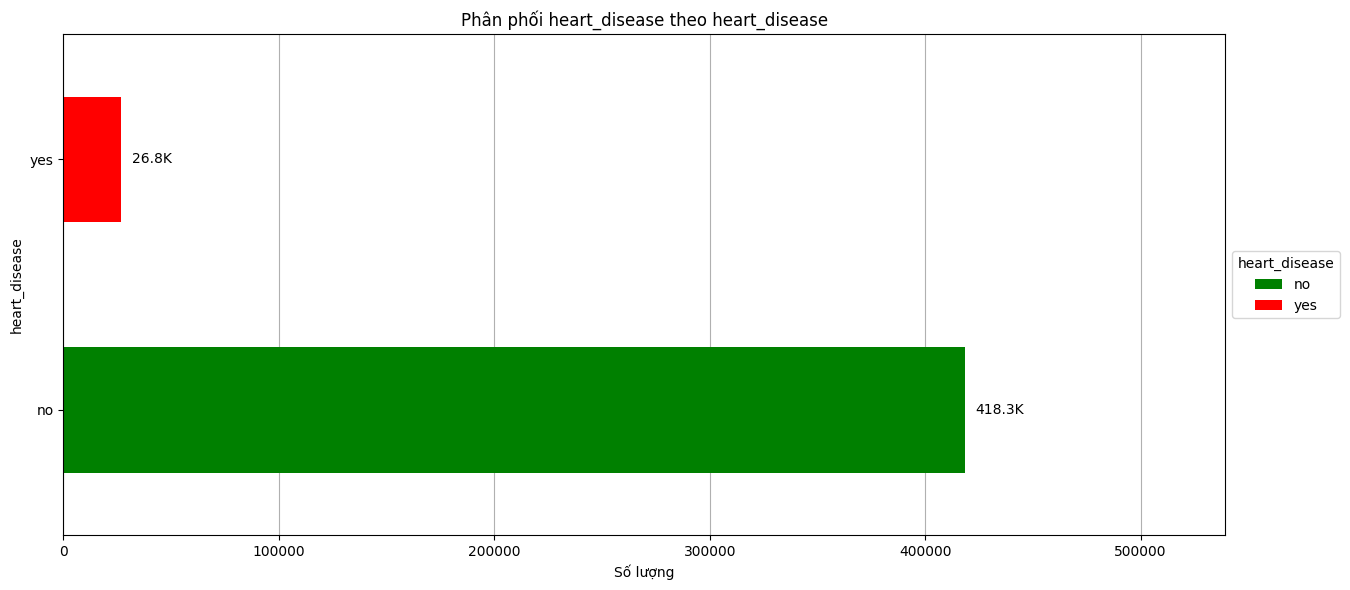

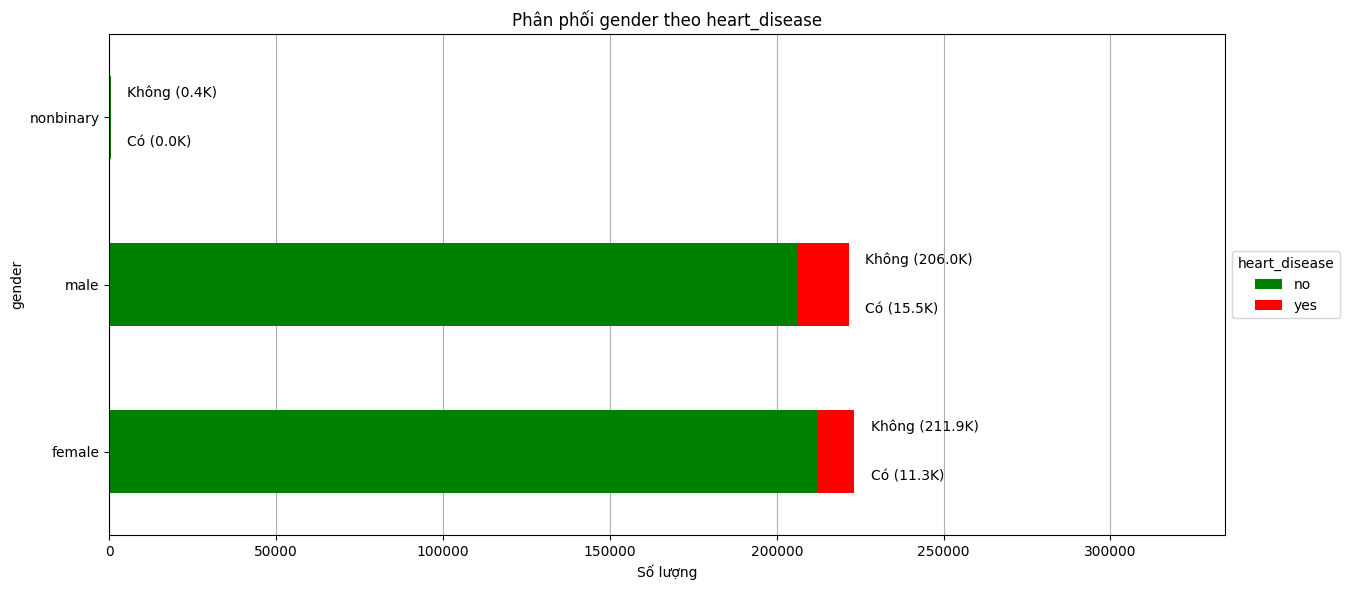

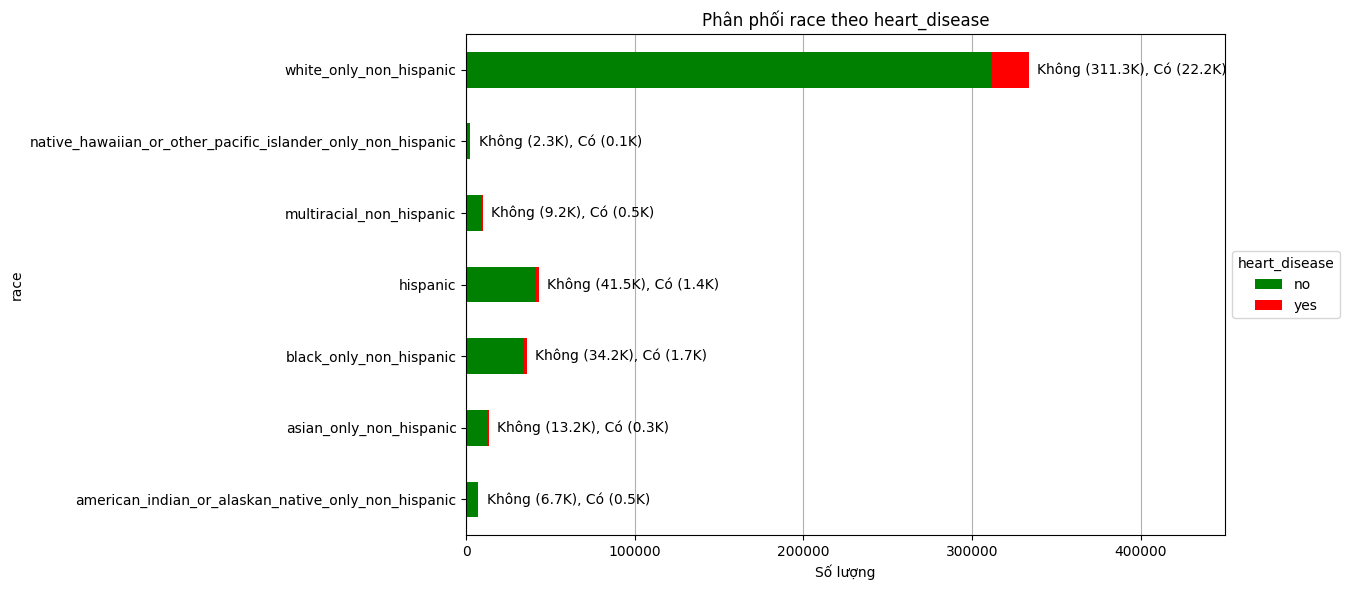

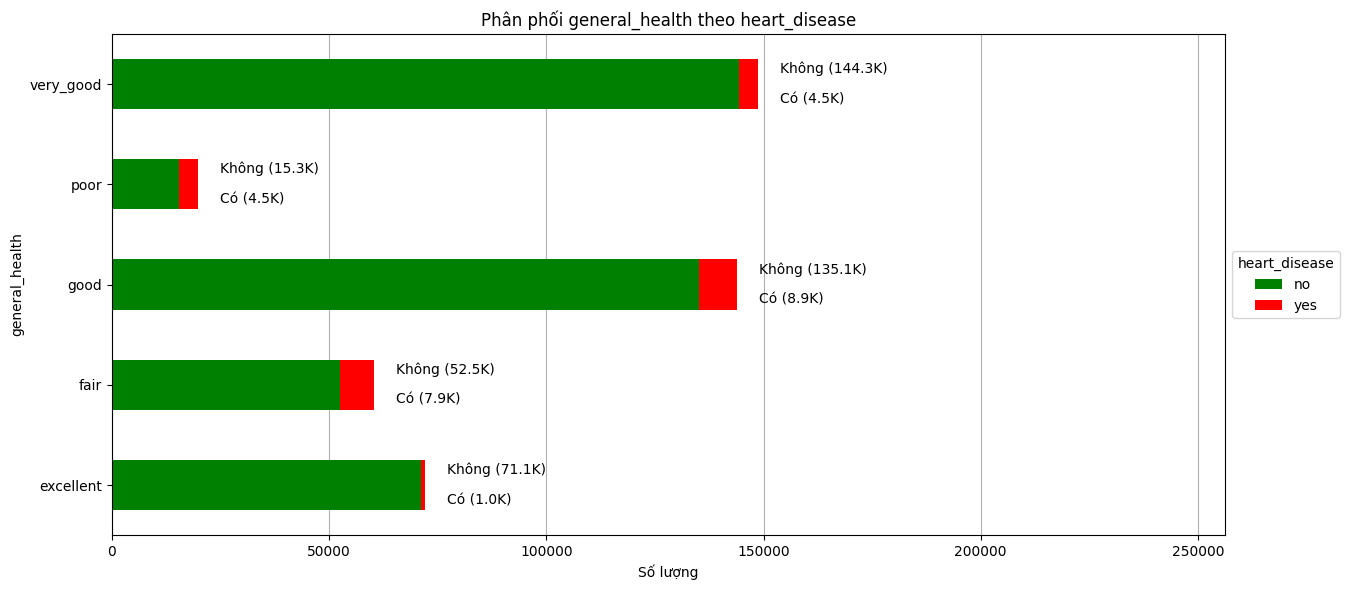

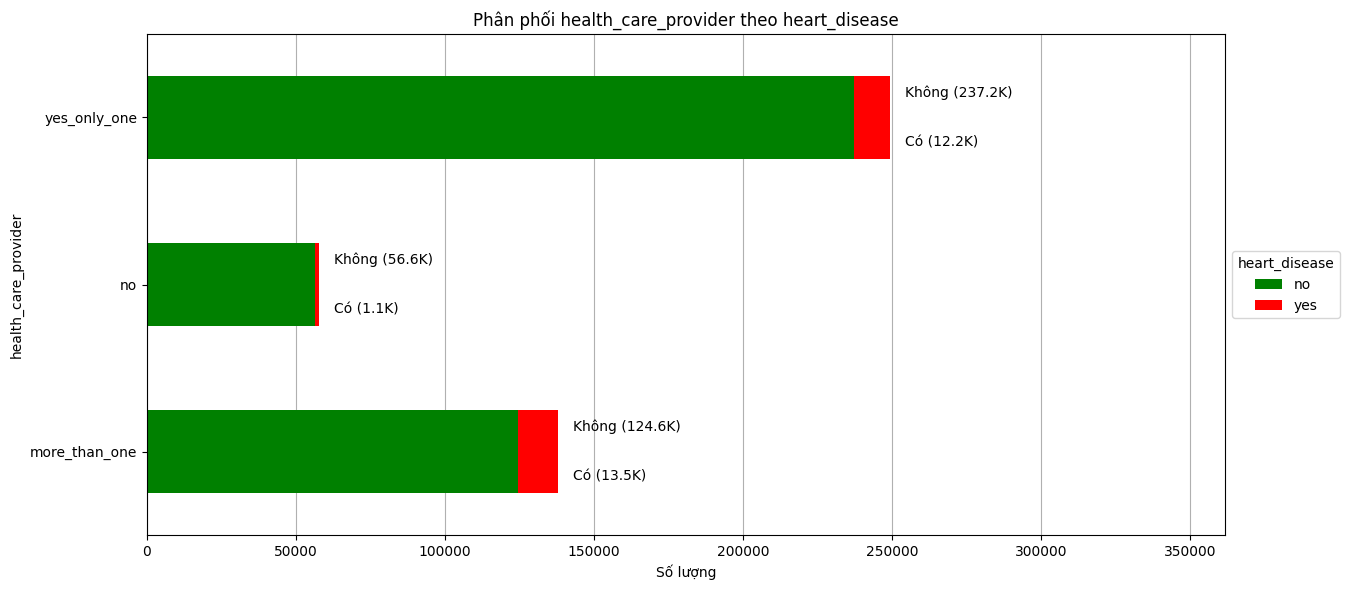

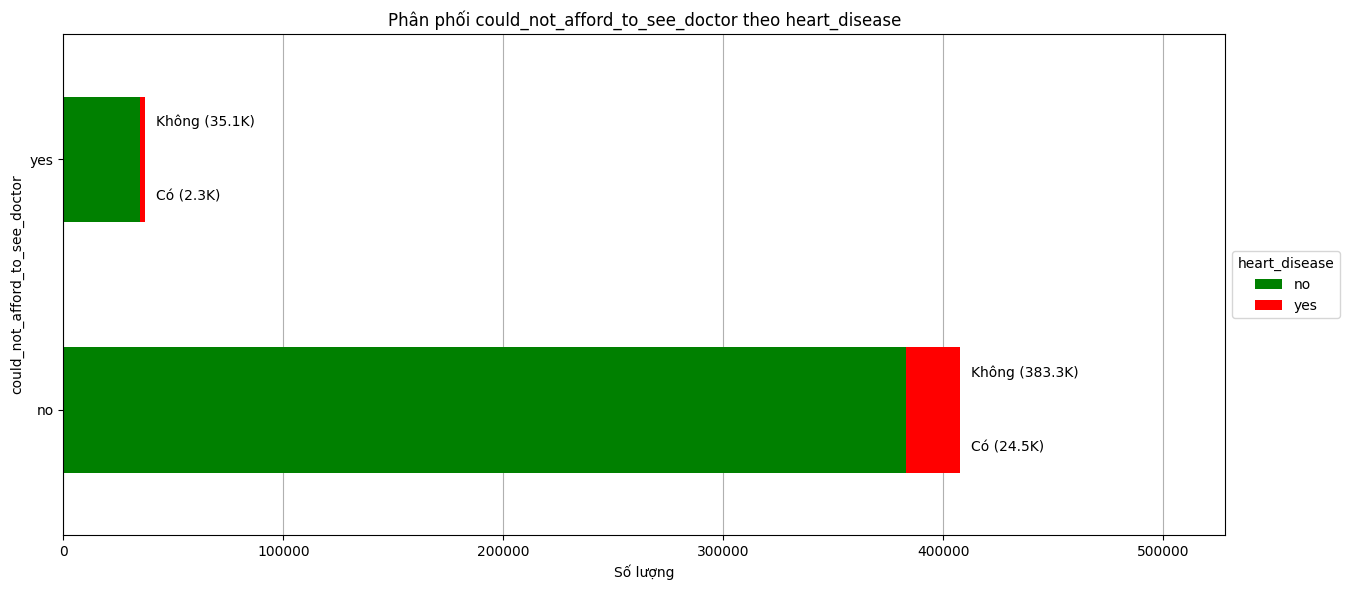

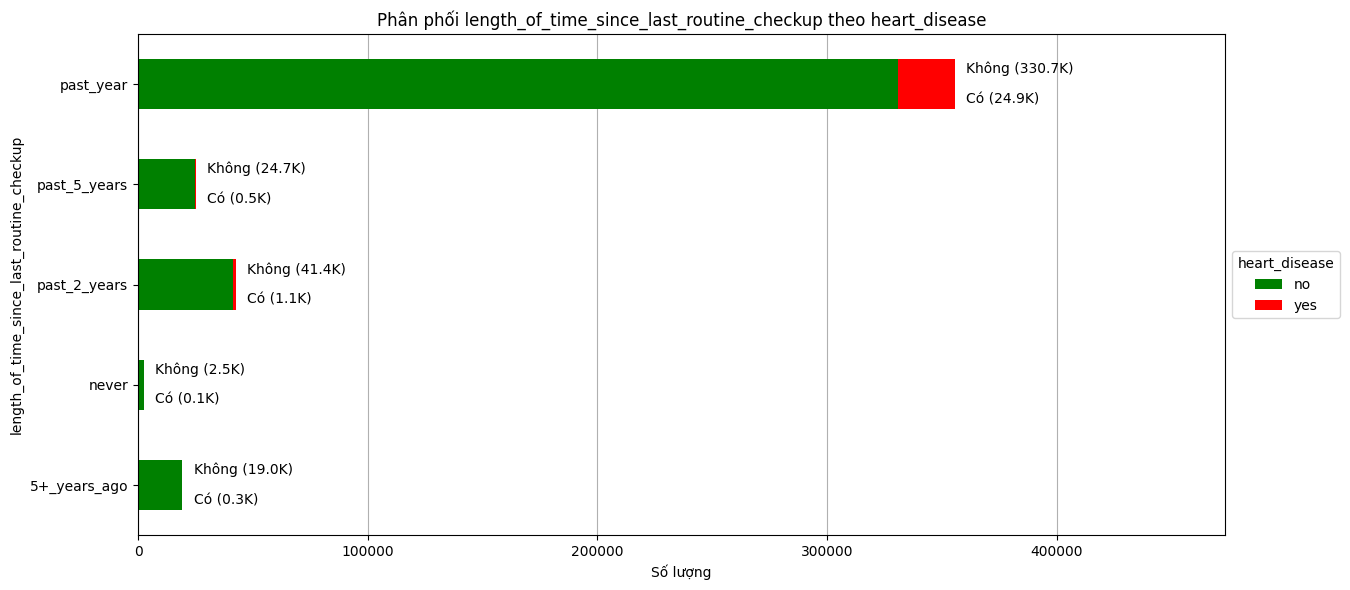

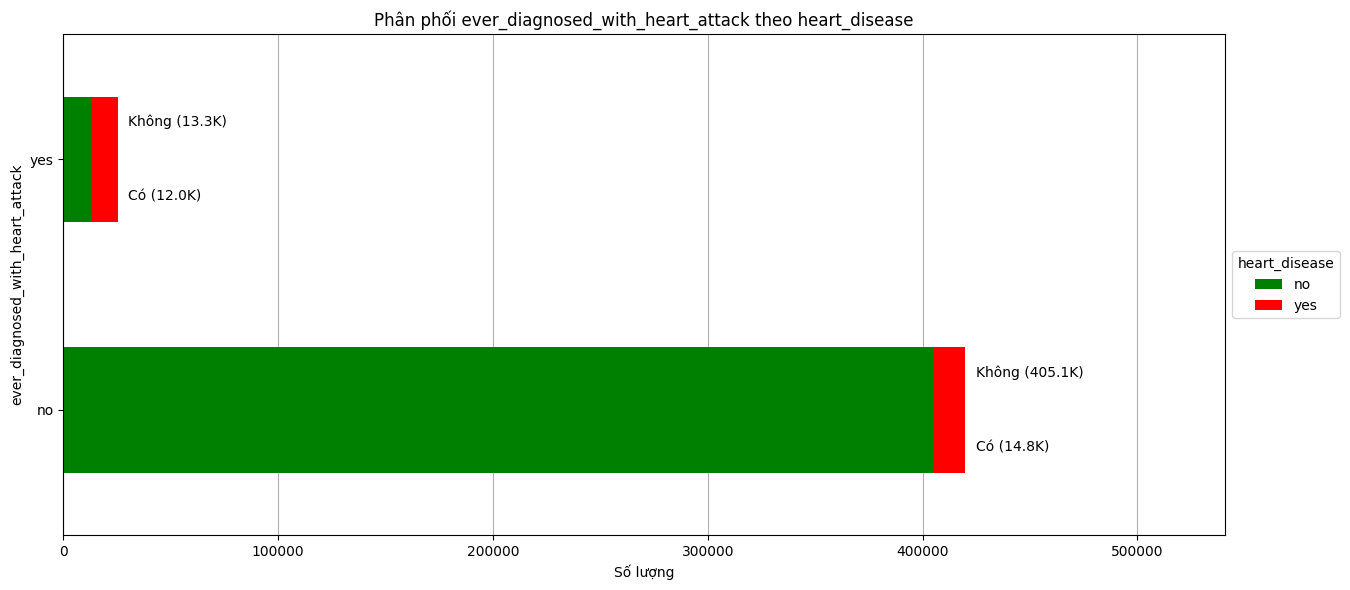

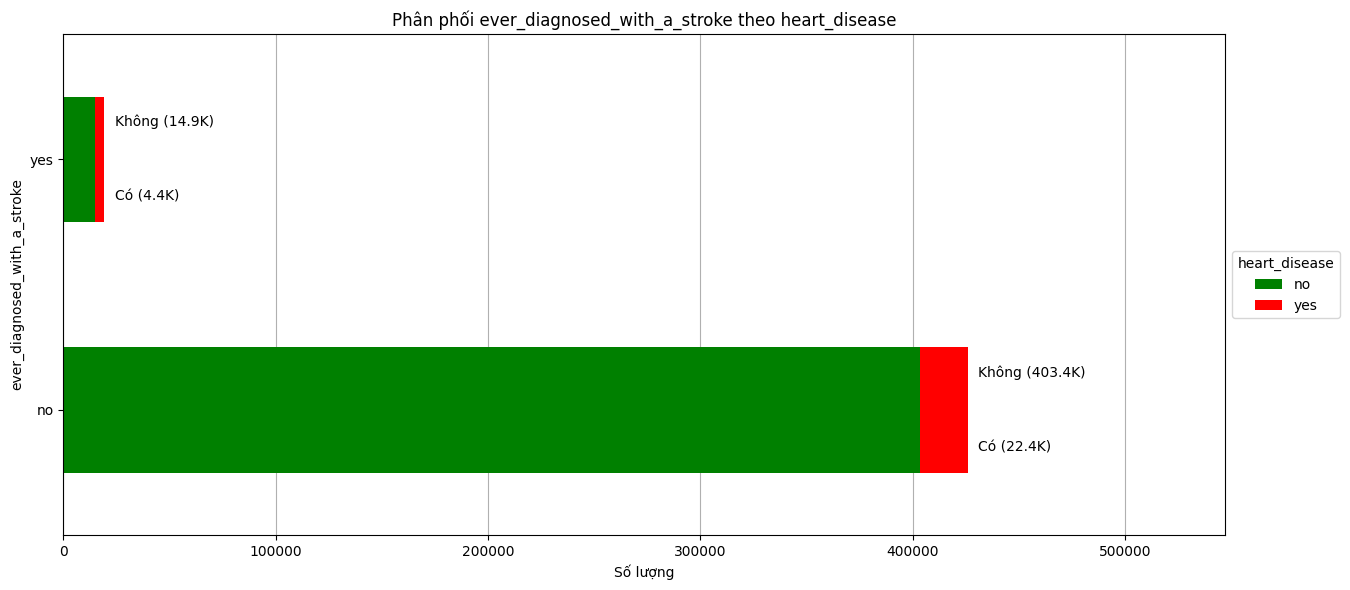

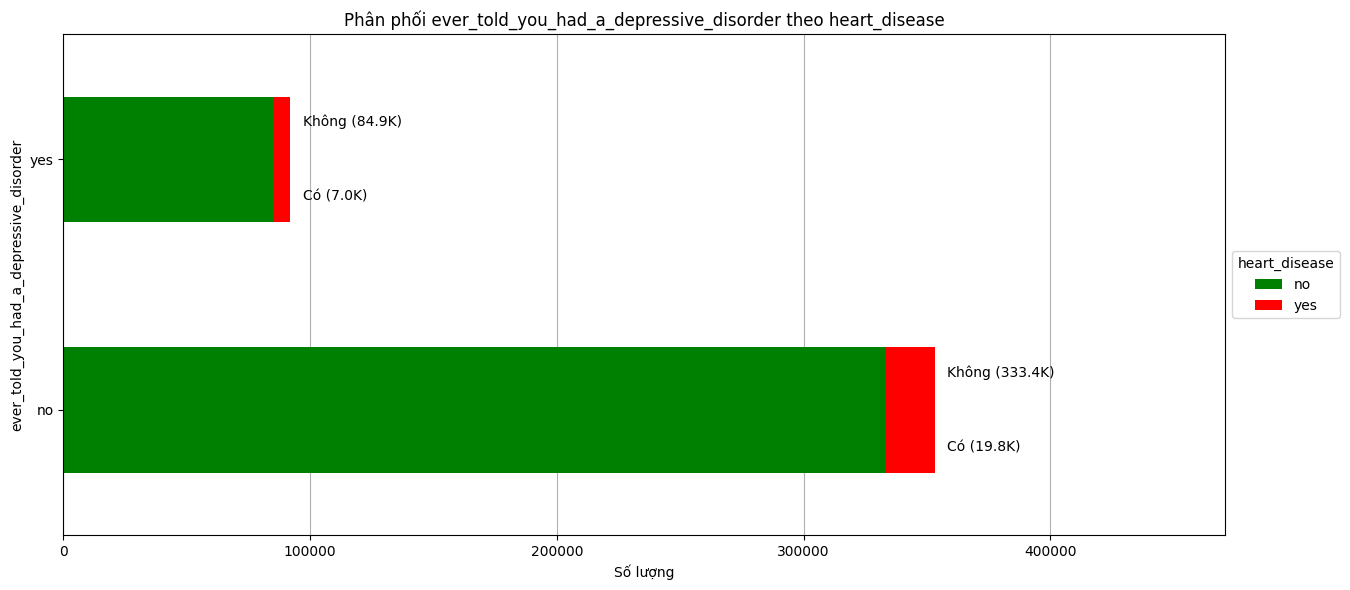

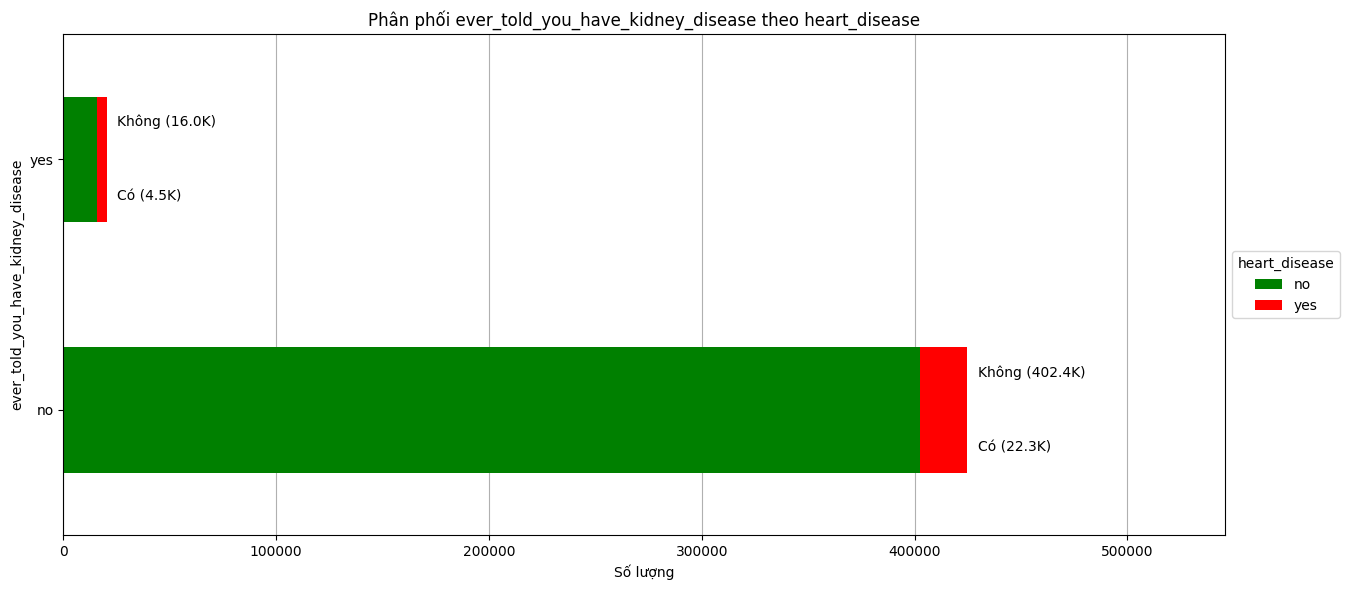

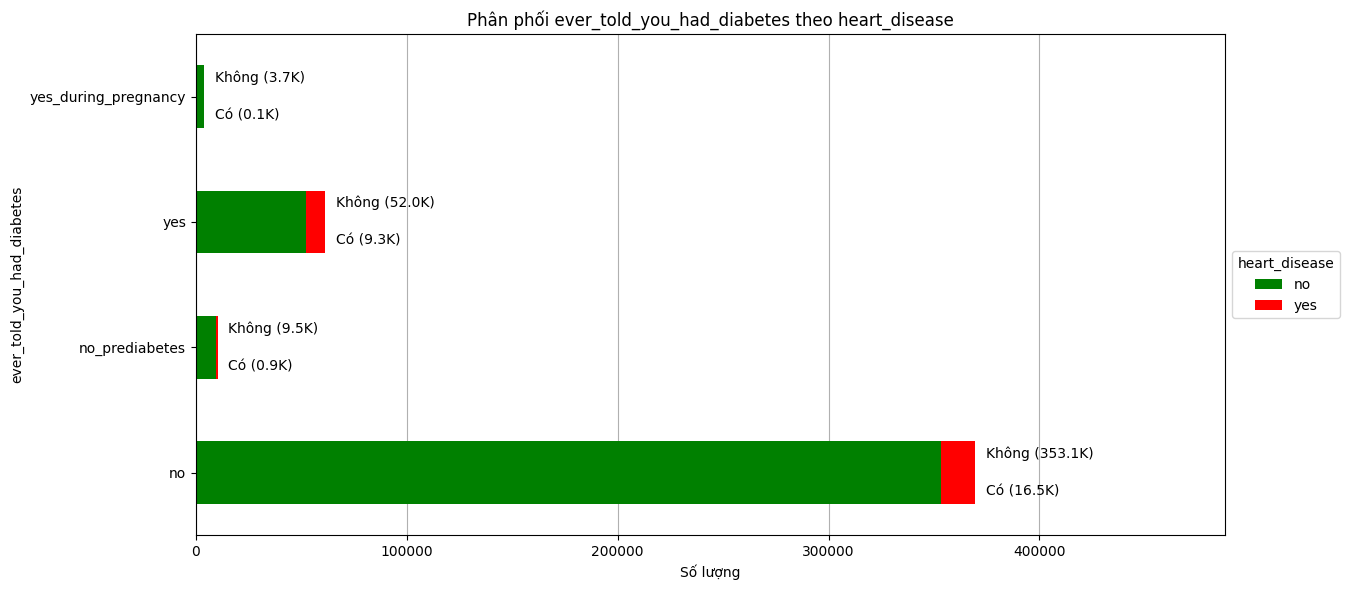

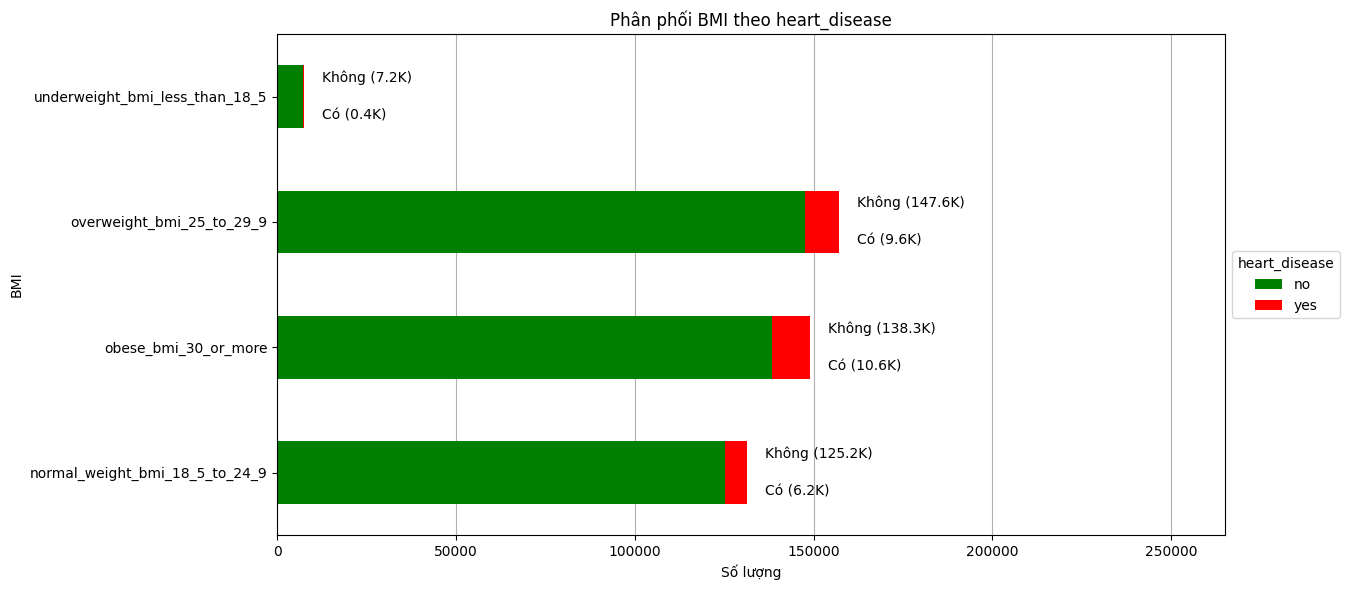

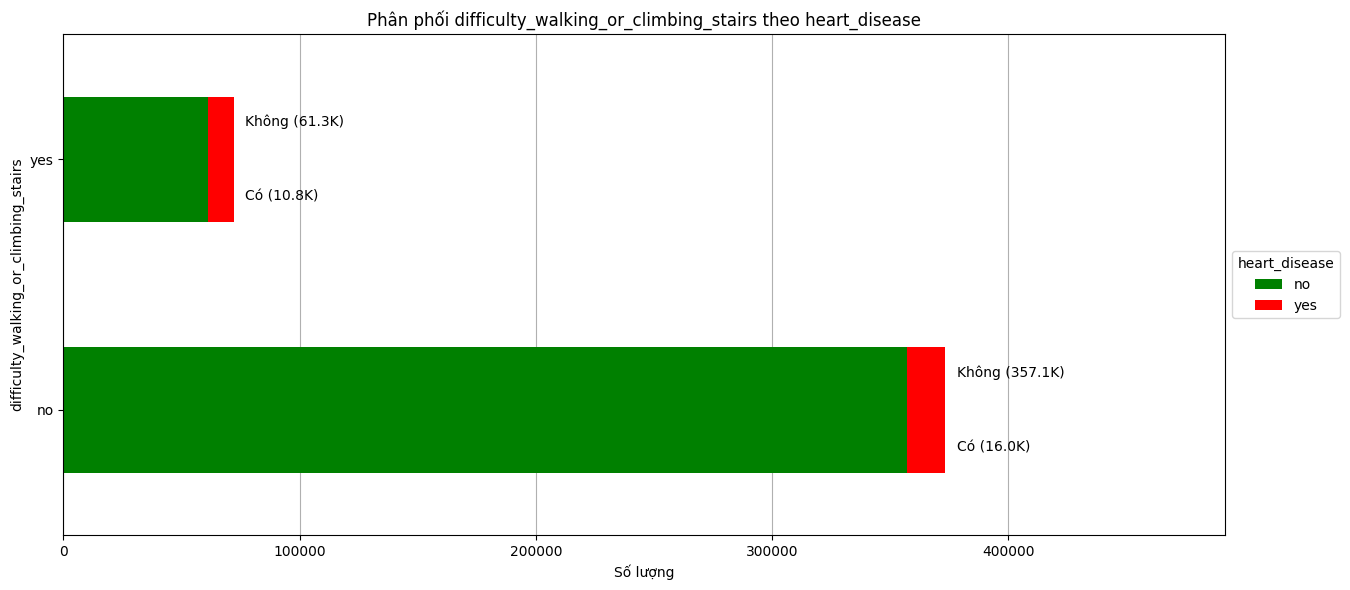

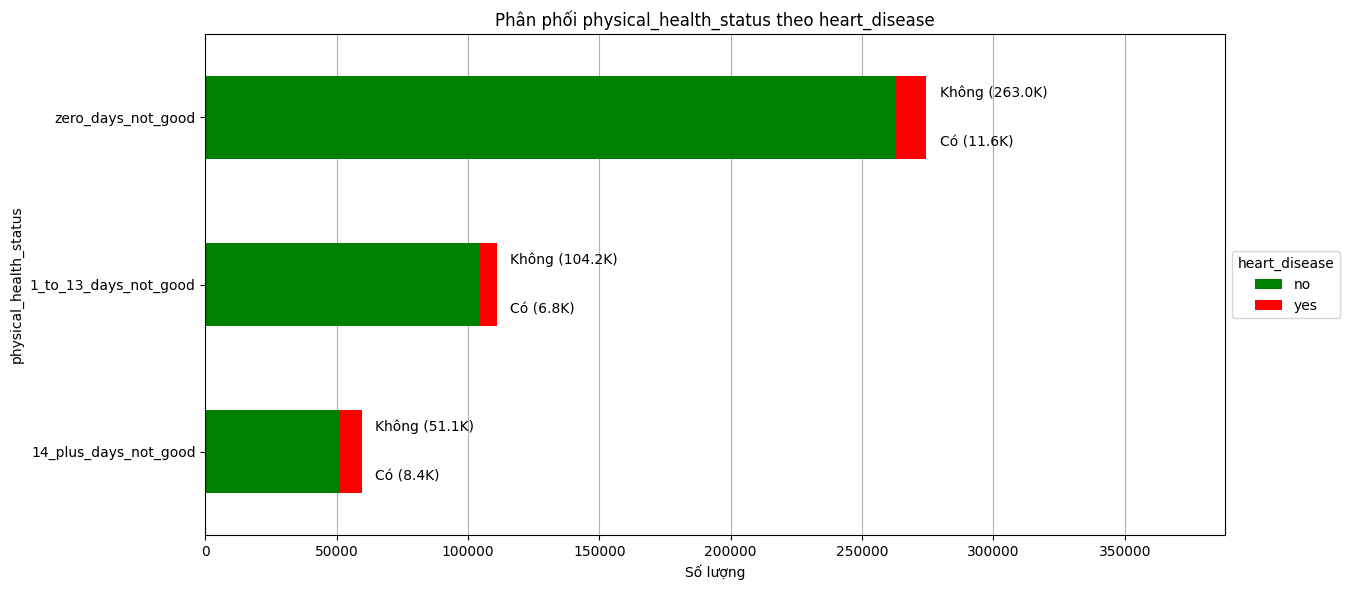

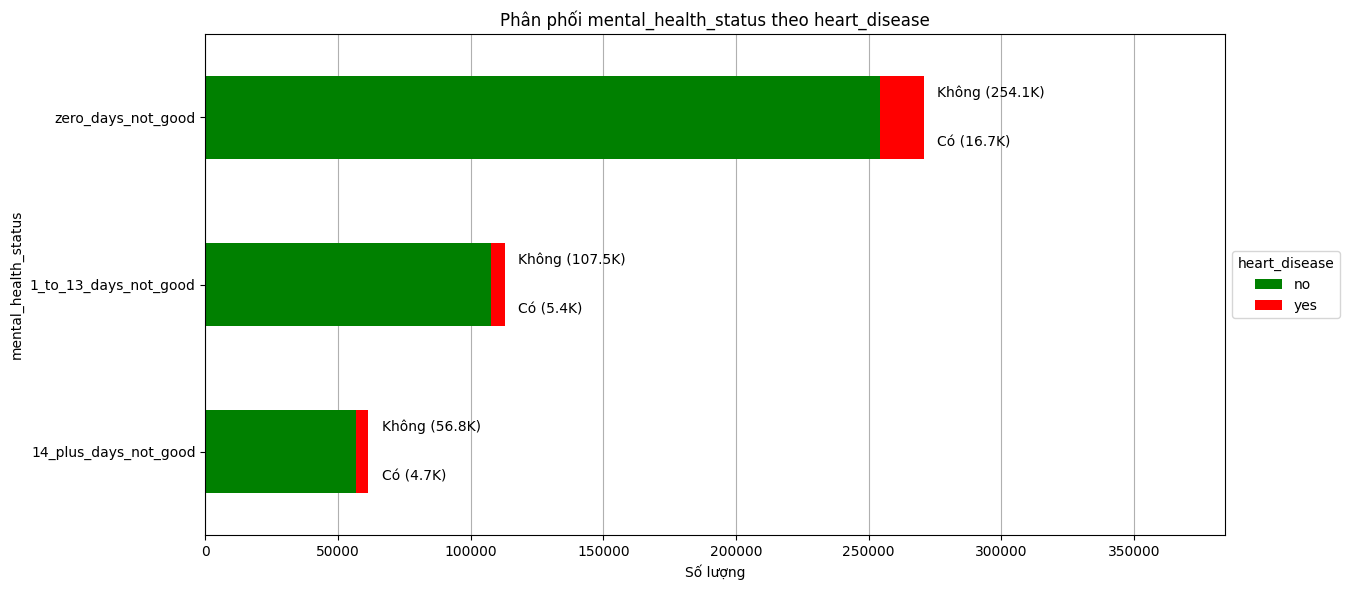

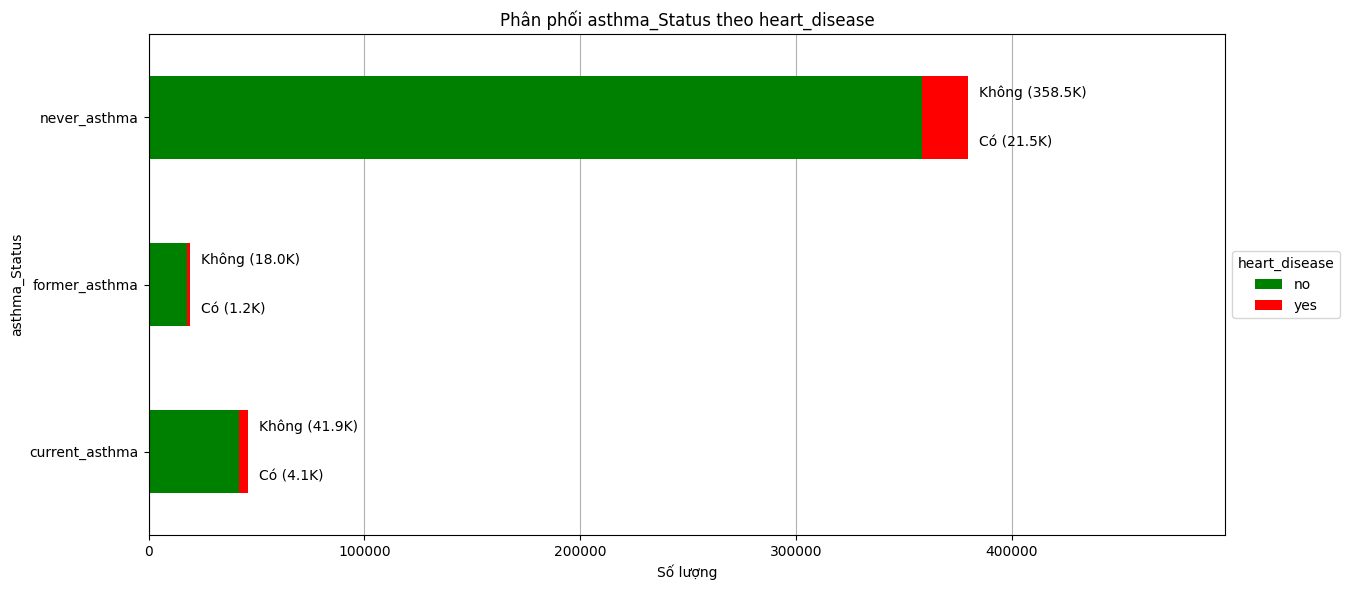

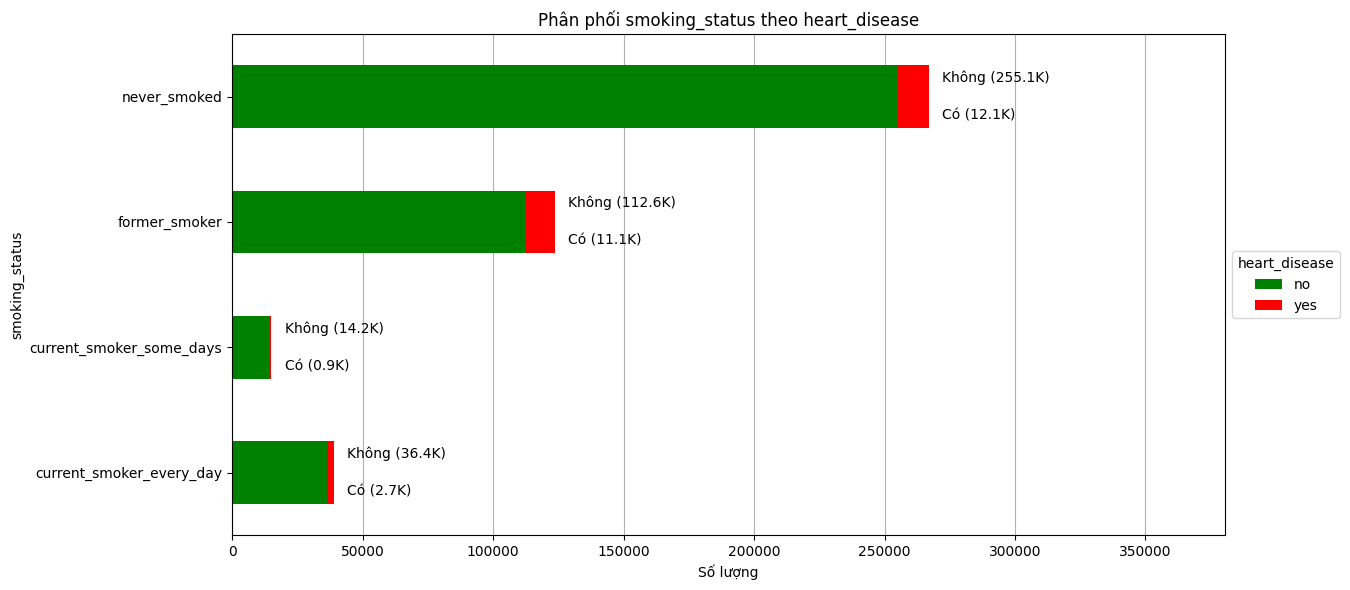

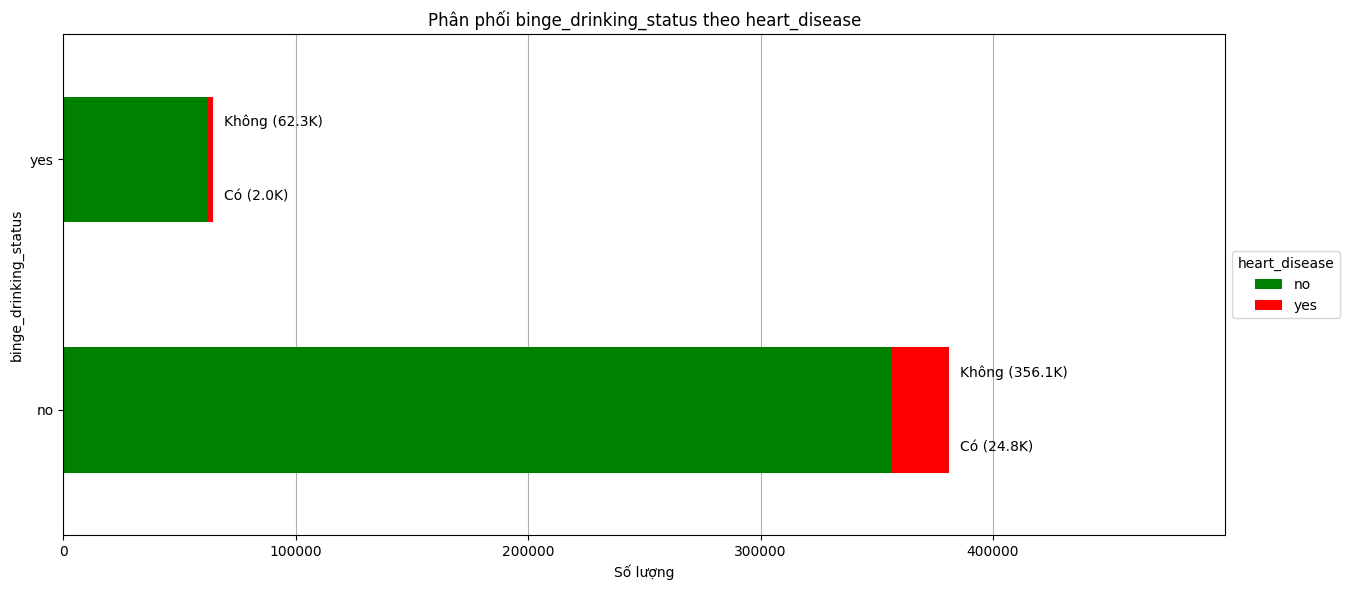

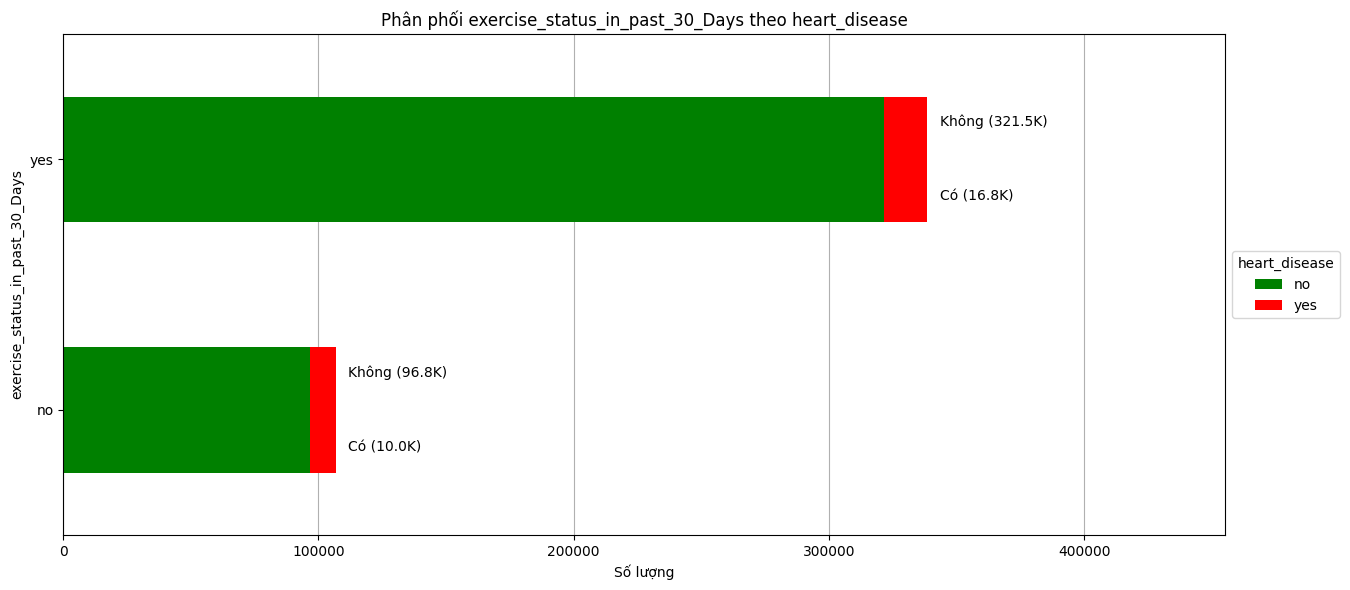

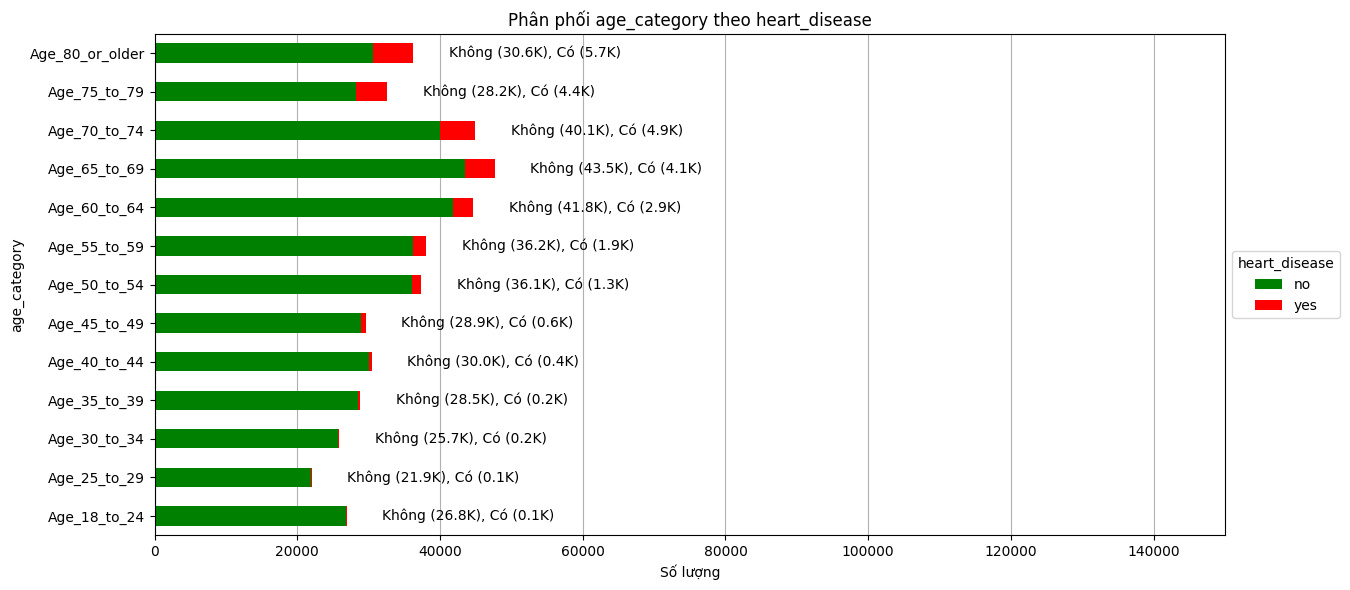

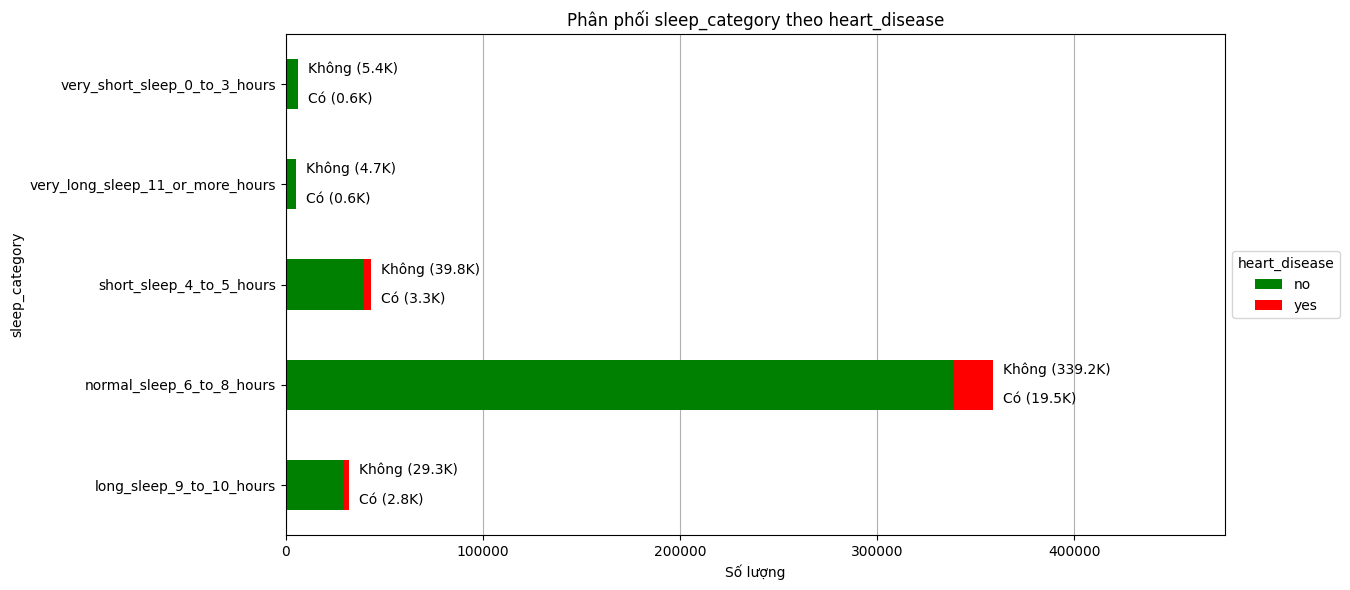

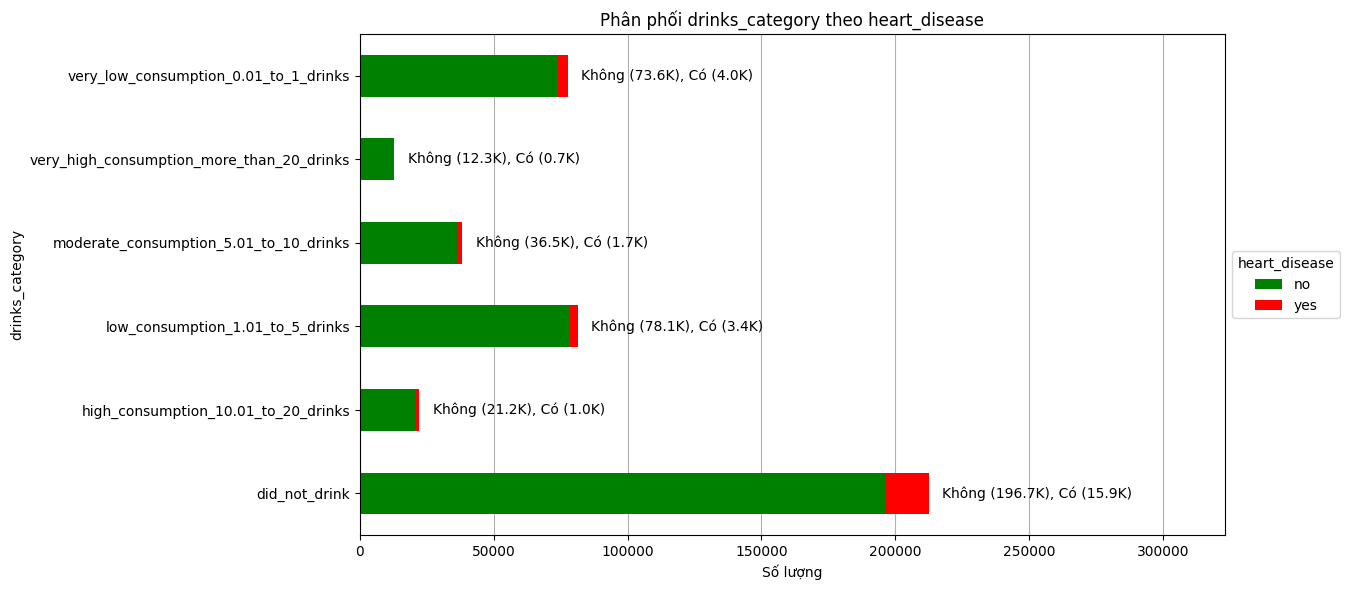

In [25]:
def plot_horizontal_stacked_bar(df, categorical_cols, target):
    """
    Vẽ biểu đồ cột ngang xếp chồng cho các biến phân loại so với biến mục tiêu.
    """
    for col in categorical_cols:
        # Tạo bảng chéo (crosstab)
        crosstab = pd.crosstab(df[col], df[target])

        # Xác định xem có từ sáu hạng mục trở lên không
        many_categories = len(crosstab) >= 6

        # Vẽ biểu đồ
        fig, ax = plt.subplots(figsize=(16, 6))  # Tăng chiều rộng của hình
        crosstab.plot(kind='barh', stacked=True, color=['green', 'red'], ax=ax)
        ax.set_title(f'Phân phối {col} theo {target}')
        ax.set_xlabel('Số lượng')
        ax.set_ylabel(col)
        ax.grid(True, axis='x')
        ax.set_axisbelow(True)  # Đưa đường lưới xuống phía sau cột

        # Thêm nhãn bên ngoài các cột
        for i in range(len(crosstab)):
            total = sum(crosstab.iloc[i])
            if col == target:
                label = f"{crosstab.iloc[i].sum() / 1000:.1f}K"
                ax.text(total + 5000, i, label, ha='left', va='center', color='black')
            else:
                label_no = f"Không ({crosstab.iloc[i, 0] / 1000:.1f}K)"
                label_yes = f"Có ({crosstab.iloc[i, 1] / 1000:.1f}K)"
                if many_categories:
                    # Nhãn hiển thị cạnh nhau
                    ax.text(total + 5000, i, f'{label_no}, {label_yes}', ha='left', va='center', color='black')
                else:
                    # Nhãn hiển thị trên dưới nhau, căn giữa
                    ax.text(total + 5000, i + 0.15, f'{label_no}', ha='left', va='center', color='black')
                    ax.text(total + 5000, i - 0.15, f'{label_yes}', ha='left', va='center', color='black')

        # Điều chỉnh giới hạn trục x để đảm bảo nhãn hiển thị đầy đủ
        ax.set_xlim(right=ax.get_xlim()[1] + 100000)

        # Di chuyển chú thích (legend) ra ngoài khu vực biểu đồ
        ax.legend(title=target, loc='center left', bbox_to_anchor=(1, 0.5))
        
        # Đảm bảo nhãn và khu vực biểu đồ không bị cắt mất
        plt.tight_layout(rect=[0, 0, 0.85, 1])
        plt.show()

# Xác định danh sách các cột phân loại
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Xác định biến mục tiêu
target = 'heart_disease'

# Gọi hàm vẽ biểu đồ
plot_horizontal_stacked_bar(df, categorical_cols, target)

## **Phân bố các đặc trưng phân loại: Giải thích biểu đồ**<a id='Categorical_feature_distributions_Chart_Interpretations'></a>  
[Contents](#Contents)

### **Bệnh tim: Biến mục tiêu**<a id='Heart_Disease_Target_Variable'></a>  
[Contents](#Contents)

### **Phân tích phân bố**  
* Có sự mất cân bằng đáng kể giữa hai nhóm.  
* Phần lớn cá nhân không mắc bệnh tim (`418.3K`), trong khi số người mắc bệnh tim ít hơn đáng kể (`26.8K`).  
* Sự mất cân bằng này có thể quan sát rõ ràng trên biểu đồ, trong đó thanh màu xanh lá cây dài hơn đáng kể so với thanh màu đỏ.  

### **Vấn đề mất cân bằng**  
* **Thiên lệch mô hình**: Khi huấn luyện mô hình phân loại trên tập dữ liệu mất cân bằng này, mô hình có thể bị thiên lệch, thường dự đoán nhóm đa số (Không mắc bệnh tim) nhiều hơn do xuất hiện thường xuyên trong dữ liệu huấn luyện.  
* **Chỉ số đánh giá hiệu suất**: Các chỉ số phổ biến như độ chính xác có thể gây hiểu lầm trong tập dữ liệu mất cân bằng. Ví dụ, một mô hình luôn dự đoán "Không mắc bệnh tim" có thể có độ chính xác cao vì nhóm đa số được đại diện tốt. Tuy nhiên, mô hình này sẽ không thể xác định đúng những người mắc bệnh tim, điều này rất quan trọng trong lĩnh vực chăm sóc sức khỏe.  
* **Recall và Precision**: Các chỉ số như recall (độ nhạy) và precision (độ chính xác) mang lại thông tin hữu ích hơn trong bối cảnh này. Recall đo lường khả năng phát hiện đúng các trường hợp dương tính thực sự (mắc bệnh tim), trong khi precision đo lường mức độ chính xác của dự đoán dương tính. Trong tập dữ liệu mất cân bằng, mô hình có thể có recall thấp đối với nhóm thiểu số (mắc bệnh tim) ngay cả khi có độ chính xác tổng thể cao.  

### **Chiến lược xử lý mất cân bằng**  
Bộ phân loại `BalancedRandomForestClassifier` từ thư viện `imbalanced-learn` giúp xử lý hiệu quả mất cân bằng lớp bằng cách sử dụng phương pháp bootstrapped sampling để cân bằng dữ liệu, đảm bảo phân loại tốt hơn cho nhóm thiểu số. Kỹ thuật này cải thiện hiệu suất mô hình bằng cách tập trung vào dữ liệu bị đánh giá thấp, phù hợp với bài toán dự đoán bệnh tim trong tập dữ liệu mất cân bằng.

### **Bệnh tim so với giới tính**<a id='Heart_Disease_vs_Gender'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Phần lớn những người mắc bệnh tim là nam giới `15.5K`, tiếp theo là nữ giới `11.3K`.  
* Rất ít người không thuộc nhị phân giới tính mắc bệnh tim, chỉ có `15 người`.  
* Sự khác biệt đáng kể về số ca mắc bệnh tim giữa nam và nữ so với nhóm không nhị phân giới tính cho thấy một sự mất cân đối rõ rệt.

### **Bệnh tim theo chủng tộc**<a id='Heart_Disease_vs_Race'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Nhóm có số lượng người mắc bệnh tim cao nhất là "White Only, Non-Hispanic" (Chỉ người da trắng, không phải gốc Tây Ban Nha) với `22.2K` người.  
* Các nhóm nhỏ hơn, như "Native Hawaiian or Other Pacific Islander Only, Non-Hispanic" (Chỉ người Hawaii bản địa hoặc người dân đảo Thái Bình Dương khác, không phải gốc Tây Ban Nha) và "Asian Only, Non-Hispanic" (Chỉ người châu Á, không phải gốc Tây Ban Nha), có rất ít người mắc bệnh tim (`100` và `300` người, tương ứng).  
* Có sự mất cân đối đáng kể về số ca bệnh tim giữa các nhóm chủng tộc khác nhau, với số ca bệnh ở các nhóm thiểu số ít hơn đáng kể.

### **Bệnh tim mạch so với Tình trạng sức khỏe chung**<a id='Heart_Disease_vs_General_Health'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Số lượng người mắc bệnh tim cao nhất thuộc nhóm sức khỏe "Good" (Tốt) với `8.9K` người, tiếp theo là nhóm "Fair" (Khá) với `7.9K` người.  
* Cả hai nhóm "Very Good" (Rất tốt) và "Poor" (Kém) đều có cùng số lượng người mắc bệnh tim là `4.5K` người.  
* Nhóm sức khỏe "Excellent" (Xuất sắc) có số lượng người mắc bệnh tim ít nhất, chỉ `1.0K` người.  
* Có sự phân bố rõ ràng về số ca bệnh tim giữa các nhóm sức khỏe tổng quát, với tỷ lệ cao nhất ở những người tự đánh giá sức khỏe của mình là "Good" (Tốt) hoặc "Fair" (Khá).

### **Bệnh tim so với Nhà cung cấp dịch vụ chăm sóc sức khỏe**<a id='Heart_Disease_vs_Health_Care_Provider'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Số lượng người mắc bệnh tim cao nhất thuộc nhóm "More Than One" (Hơn một) nhà cung cấp dịch vụ chăm sóc sức khỏe với `13.5K` người.  
* Nhóm "Yes, Only One" (Có, chỉ một) cũng có số lượng đáng kể người mắc bệnh tim, với `12.2K` người.  
* Nhóm "No" (Không) có nhà cung cấp dịch vụ chăm sóc sức khỏe có số lượng người mắc bệnh tim ít nhất, chỉ `1.1K` người.  
* Phân bố này cho thấy những người có "More Than One" (Hơn một) hoặc ít nhất "Yes, Only One" (Có, chỉ một) nhà cung cấp dịch vụ chăm sóc sức khỏe có khả năng mắc bệnh tim cao hơn so với những người thuộc nhóm "No" (Không) nhà cung cấp dịch vụ chăm sóc sức khỏe.

### **Bệnh tim so với khả năng tiếp cận bác sĩ**<a id='Heart_Disease_vs_Doctor_availability'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Phần lớn số người mắc bệnh tim thuộc nhóm "Could Afford to See a Doctor" (Có khả năng chi trả khi khám bác sĩ) với `24.5K` người.  
* Một số lượng nhỏ hơn thuộc nhóm "Could Not Afford to See a Doctor" (Không có khả năng chi trả khi khám bác sĩ) với `2.3K` người.  
* Phân bố này cho thấy rằng ngay cả trong số những người mắc bệnh tim, đa số vẫn có khả năng chi trả khi khám bác sĩ, điều này gợi ý rằng khả năng tiếp cận chăm sóc y tế không hoàn toàn giúp giảm nguy cơ mắc bệnh tim.  
* Tuy nhiên, sự hiện diện của bệnh tim ở những người không có khả năng chi trả khi khám bác sĩ nhấn mạnh vấn đề tiềm ẩn về khả năng tiếp cận dịch vụ chăm sóc y tế phòng ngừa hoặc điều trị.

### **Bệnh tim so với kiểm tra sức khỏe định kỳ**<a id='Heart_Disease_vs_routine_checkup'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Phần lớn những người mắc bệnh tim đã thực hiện kiểm tra sức khỏe định kỳ trong vòng một năm qua ("within the past year" - trong vòng một năm) `24.9K`. Điều này cho thấy những người mắc bệnh tim có khả năng đã nhận được sự chăm sóc y tế gần đây.  
* Số lượng người mắc bệnh tim giảm đáng kể trong nhóm có kiểm tra sức khỏe cách đây ("past 2 years" - trong vòng 2 năm) `1.1K` và ("past 5 years" - trong vòng 5 năm) `0.5K`.  
* Rất ít người mắc bệnh tim báo cáo rằng họ chưa từng kiểm tra sức khỏe định kỳ ("never" - chưa từng) `0.1K` hoặc lần kiểm tra gần nhất của họ đã cách đây hơn 5 năm ("more than 5 years ago" - hơn 5 năm trước) `0.3K`.  
* Sự phân bố này cho thấy ngay cả những người thường xuyên kiểm tra sức khỏe vẫn có nguy cơ mắc bệnh tim, nhấn mạnh tầm quan trọng của việc theo dõi và phát hiện sớm. Tuy nhiên, những người kiểm tra sức khỏe không thường xuyên hoặc chưa từng kiểm tra có thể ít được chẩn đoán hơn, có thể do nhận thức về sức khỏe thấp hoặc hạn chế trong việc tiếp cận dịch vụ y tế.

### **Bệnh tim và Cơn đau tim**<a id='Heart_Disease_vs_Heart_Attack'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Một số lượng đáng kể người mắc bệnh tim cũng đã được chẩn đoán bị "Heart Attack" (Cơn đau tim) `12.0K`. Điều này cho thấy mối tương quan mạnh mẽ giữa tiền sử cơn đau tim và sự hiện diện của bệnh tim.  
* Cũng có một số lượng lớn người mắc bệnh tim nhưng không được chẩn đoán bị "Heart Attack" (Cơn đau tim) `14.8K`. Điều này cho thấy bệnh tim có thể phát triển mà không cần có tiền sử cơn đau tim.  
* Phân bố này cho thấy rằng mặc dù một cơn đau tim trước đó là một dấu hiệu quan trọng của bệnh tim, nhiều người mắc bệnh tim không có tiền sử "Heart Attack" (Cơn đau tim), nhấn mạnh sự cần thiết của các đánh giá rủi ro tim mạch toàn diện, không chỉ dựa vào tiền sử cơn đau tim.

### **Bệnh Tim và Đột Quỵ**<a id='Heart_Disease_vs_Stroke'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Một số lượng đáng kể người mắc bệnh tim cũng đã được chẩn đoán bị đột quỵ `4.4K` (4.400 người). Điều này cho thấy mối tương quan đáng kể giữa tiền sử đột quỵ và sự xuất hiện của bệnh tim.  
* Số lượng lớn hơn người mắc bệnh tim không có tiền sử đột quỵ `22.4K` (22.400 người). Điều này chứng tỏ bệnh tim có thể xảy ra mà không cần chẩn đoán đột quỵ trước đó.  
* Phân bố này cho thấy mặc dù đột quỵ trước đó là một yếu tố nguy cơ quan trọng đối với bệnh tim, nhưng nhiều người mắc bệnh tim không có tiền sử đột quỵ. Điều này nhấn mạnh tầm quan trọng của việc đánh giá toàn diện nguy cơ tim mạch, xem xét nhiều yếu tố nguy cơ khác ngoài tiền sử đột quỵ.

### **Bệnh tim so với Bệnh thận**<a id='Heart_Disease_vs_Kidney_Disease'></a>  
[Danh mục nội dung](#Contents)

**Phân tích phân bố**  

* Một số lượng đáng kể người mắc bệnh tim cũng được chẩn đoán mắc bệnh thận `4.5K` (4.500 người). Điều này cho thấy có mối tương quan giữa bệnh thận và bệnh tim.  
* Một số lượng lớn hơn người mắc bệnh tim không được chẩn đoán mắc bệnh thận `22.3K` (22.300 người). Điều này chứng tỏ bệnh tim thường xuất hiện độc lập với bệnh thận.  
* Phân bố này cho thấy mặc dù bệnh thận là một yếu tố nguy cơ đáng kể đối với bệnh tim, nhưng phần lớn những người mắc bệnh tim không có tiền sử bệnh thận. Điều này nhấn mạnh tầm quan trọng của việc đánh giá nhiều yếu tố nguy cơ đối với bệnh tim, không chỉ giới hạn ở tiền sử bệnh thận.

### **Bệnh tim so với Bệnh tiểu đường**<a id='Heart_Disease_vs_Diabetes'></a>  
[Danh mục nội dung](#Contents)

**Phân tích phân bố**  

* Số lượng người mắc bệnh tim cao nhất thuộc nhóm không mắc bệnh tiểu đường `"No"` (Không) với `16.5K` người. Điều này cho thấy bệnh tim vẫn phổ biến ngay cả ở những người không được chẩn đoán mắc tiểu đường.  
* Một số lượng đáng kể người mắc bệnh tim đã được chẩn đoán mắc bệnh tiểu đường `"Diabetes"` (Tiểu đường) với `9.3K` người. Điều này nhấn mạnh mối tương quan chặt chẽ giữa bệnh tiểu đường và bệnh tim.  
* Một số ít người mắc bệnh tim thuộc nhóm tiền tiểu đường `"Prediabetes"` (Tiền tiểu đường) với `0.9K` người hoặc mắc tiểu đường trong thai kỳ `"Diabetes during pregnancy"` (Tiểu đường thai kỳ) với `0.1K` người. Điều này cho thấy hai tình trạng này ít phổ biến hơn so với chẩn đoán tiểu đường đầy đủ ở những người mắc bệnh tim.  
* Phân bố này nhấn mạnh tầm quan trọng của việc theo dõi và kiểm soát bệnh tiểu đường như một yếu tố nguy cơ quan trọng đối với bệnh tim. Tuy nhiên, sự hiện diện của bệnh tim ở những người không mắc tiểu đường cho thấy nguy cơ tim mạch có tính chất đa yếu tố.

### **Bệnh tim và Chỉ số khối cơ thể (BMI)**<a id='Heart_Disease_vs_BMI'></a>  
[Contents](#Contents)

**Phân tích phân bố**  

* Số lượng người mắc bệnh tim cao nhất thuộc nhóm "obese" (béo phì) `10.6K`, cho thấy mối tương quan mạnh mẽ giữa béo phì và bệnh tim.  
* Nhóm "overweight" (thừa cân) cũng có số lượng đáng kể người mắc bệnh tim `9.6K`, nhấn mạnh mối liên hệ giữa chỉ số BMI cao và nguy cơ mắc bệnh tim.  
* Nhóm có "normal weight" (cân nặng bình thường) `6.2K` và "underweight" (thiếu cân) `0.4K` có số ca bệnh tim ít hơn, cho thấy duy trì cân nặng bình thường có thể liên quan đến nguy cơ mắc bệnh tim thấp hơn.  
* Phân bố này nhấn mạnh tầm quan trọng của việc kiểm soát cân nặng để giảm nguy cơ mắc bệnh tim, trong đó béo phì và thừa cân là hai yếu tố cần được quan tâm hàng đầu.

### **Bệnh tim và Khó khăn khi đi bộ hoặc leo cầu thang**<a id='Heart_Disease_vs_Difficulty_Walking_or_Climbing'></a>  
[Contents](#Contents)

### **Phân tích phân bố**  

* Một số lượng đáng kể người mắc bệnh tim gặp khó khăn khi đi bộ hoặc leo cầu thang (`10.8K`). Điều này cho thấy mối liên hệ chặt chẽ giữa các vấn đề vận động và sự hiện diện của bệnh tim.  
* Một số lượng người mắc bệnh tim cao hơn một chút không gặp khó khăn khi đi bộ hoặc leo cầu thang (`16.0K`). Điều này chứng tỏ rằng bệnh tim vẫn có thể xảy ra ngay cả ở những người không có vấn đề nghiêm trọng về vận động.  
* Sự phân bố này cho thấy khó khăn khi đi bộ hoặc leo cầu thang là một yếu tố nguy cơ đáng kể đối với bệnh tim. Tuy nhiên, nó cũng nhấn mạnh rằng một số lượng lớn người mắc bệnh tim không gặp vấn đề về vận động. Điều này nhấn mạnh tầm quan trọng của việc đánh giá toàn diện các yếu tố nguy cơ tim mạch, không chỉ giới hạn ở khả năng vận động.

### **Bệnh Tim và Tình Trạng Sức Khỏe Thể Chất**<a id='Heart_Disease_vs_Physical_Health_Status'></a>  
[Danh mục nội dung](#Contents)

### **Phân Tích Phân Bố**  

* Số lượng cao nhất những người mắc bệnh tim báo cáo rằng họ không có ngày nào cảm thấy sức khỏe thể chất kém `11.6K`. Điều này cho thấy một phần lớn những người mắc bệnh tim vẫn cảm nhận sức khỏe thể chất của họ là tốt.  
* Một số lượng đáng kể những người mắc bệnh tim báo cáo có 14 ngày trở lên cảm thấy sức khỏe thể chất không tốt `8.4K`. Điều này gợi ý mối tương quan giữa các giai đoạn kéo dài sức khỏe thể chất kém và bệnh tim.  
* Những người báo cáo có từ 1 đến 13 ngày cảm thấy sức khỏe thể chất không tốt chiếm `6.8K` trường hợp mắc bệnh tim.  
* Phân bố này nhấn mạnh tầm quan trọng của việc xem xét tình trạng sức khỏe thể chất khi đánh giá nguy cơ mắc bệnh tim. Mặc dù nhiều người mắc bệnh tim báo cáo sức khỏe thể chất tốt, vẫn có một nhóm đáng kể trải qua nhiều ngày sức khỏe kém, có thể là dấu hiệu của các vấn đề tiềm ẩn.

### **Bệnh Tim và Tình Trạng Sức Khỏe Tâm Thần**<a id='Heart_Disease_vs_Mental_Health_Status'></a>  
[Danh mục nội dung](#Contents)

### **Phân Tích Phân Bố**  

* Số lượng cao nhất những người mắc bệnh tim báo cáo rằng họ không có ngày nào cảm thấy sức khỏe tinh thần kém `16.7K`. Điều này gợi ý rằng nhiều người mắc bệnh tim vẫn cảm nhận sức khỏe tinh thần của họ là tốt.  
* Một số lượng đáng kể những người mắc bệnh tim báo cáo có từ 1 đến 13 ngày cảm thấy sức khỏe tinh thần không tốt `5.4K`. Điều này cho thấy một mối tương quan đáng chú ý giữa các giai đoạn tinh thần suy giảm và bệnh tim.  
* Những người báo cáo có 14 ngày trở lên cảm thấy sức khỏe tinh thần không tốt chiếm `4.7K` trường hợp mắc bệnh tim. Điều này gợi ý rằng thời gian dài gặp vấn đề về sức khỏe tinh thần cũng là một yếu tố liên quan đến bệnh tim.  
* Phân bố này nhấn mạnh tầm quan trọng của việc xem xét sức khỏe tinh thần khi đánh giá nguy cơ mắc bệnh tim. Mặc dù nhiều người mắc bệnh tim báo cáo sức khỏe tinh thần tốt, vẫn có một nhóm đáng kể trải qua các giai đoạn sức khỏe tinh thần kém thường xuyên, cho thấy nhu cầu đánh giá sức khỏe toàn diện.

### **Bệnh Tim Mạch và Bệnh Hen Suyễn**<a id='Heart_Disease_vs_Asthma'></a>  
[Danh Mục Nội Dung](#Contents)

### **Phân tích phân bố**  

* Phần lớn số người mắc bệnh tim thuộc nhóm **"Never Asthma"** (Chưa từng bị hen suyễn) với **21.5K** người.  
  → Điều này cho thấy rằng phần lớn những người mắc bệnh tim không có tiền sử hen suyễn.  

* Một số lượng nhỏ hơn thuộc nhóm **"Current Asthma"** (Đang bị hen suyễn) với **4.1K** người.  
  → Điều này cho thấy mối liên hệ giữa hen suyễn đang diễn ra và bệnh tim.  

* Số người mắc bệnh tim ít nhất thuộc nhóm **"Former Asthma"** (Từng bị hen suyễn) với **1.2K** người.  
  → Điều này cho thấy những người từng bị hen suyễn trong quá khứ ít phổ biến hơn trong nhóm mắc bệnh tim so với những người chưa từng bị hoặc đang bị hen suyễn.  

* Phân bố này nhấn mạnh tầm quan trọng của việc xem xét tình trạng hen suyễn khi đánh giá nguy cơ mắc bệnh tim.  
  → Mặc dù nhiều người mắc bệnh tim chưa từng bị hen suyễn, vẫn có một nhóm đáng kể đang bị hen suyễn, cho thấy cần theo dõi và quản lý cẩn thận cả hai tình trạng này.

### **Bệnh tim và tình trạng hút thuốc**<a id='Heart_Disease_vs_Smoking_Status'></a>  
[Danh mục nội dung](#Contents)

**Phân tích phân bố**  

* Phần lớn số người mắc bệnh tim thuộc nhóm "Never Smoked" (Chưa từng hút thuốc) với `12.1K` người. Điều này có thể phản ánh số lượng dân số lớn hơn của nhóm chưa từng hút thuốc.  
* Nhóm "Former Smoker" (Đã từng hút thuốc) có số ca mắc bệnh tim cao `11.1K`. Điều này cho thấy rằng tác động tiêu cực của hút thuốc có thể kéo dài ngay cả sau khi ngừng, dẫn đến tỷ lệ mắc bệnh tim cao hơn ở những người từng hút thuốc.  
* Nhóm "Current Smoker - Every Day" (Đang hút thuốc mỗi ngày) cũng có số ca mắc bệnh tim đáng kể `2.7K`, cho thấy rằng việc hút thuốc liên tục góp phần lớn vào nguy cơ mắc bệnh tim.  
* Điều thú vị là nhóm "Current Smoker - Some Days" (Đang hút thuốc một số ngày) có số ca mắc bệnh tim thấp nhất `0.9K`. Điều này có thể do quy mô nhóm này nhỏ hơn hoặc do báo cáo chưa đầy đủ.  

**Tại sao nhóm đã từng hút thuốc có số ca mắc cao hơn nhóm đang hút thuốc một số ngày?**  

* **Tác động lâu dài của hút thuốc:** Những người từng hút thuốc có thể đã hút trong nhiều năm trước khi bỏ, dẫn đến tổn thương tích lũy cho hệ tim mạch. Các tác động xấu của việc hút thuốc kéo dài có thể duy trì lâu sau khi ngừng hút, làm tăng nguy cơ mắc bệnh tim.  
* **Cải thiện sức khỏe:** Những người đang hút thuốc một số ngày có thể có mức độ phơi nhiễm với độc tố từ thuốc lá thấp hơn so với những người từng hút thuốc thường xuyên trong nhiều năm trước khi bỏ.  
* **Quy mô nhóm:** Nhóm đã từng hút thuốc có thể bao gồm một nhóm người lớn hơn và đa dạng hơn so với nhóm đang hút thuốc một số ngày, nhóm này có thể nhỏ hơn và ít đại diện cho những người hút thuốc nặng, lâu dài.  

Phân bố này nhấn mạnh tầm quan trọng của việc xem xét tiền sử hút thuốc khi đánh giá nguy cơ mắc bệnh tim. Ngay cả sau khi bỏ thuốc, những người từng hút thuốc vẫn có nguy cơ cao, điều này cho thấy tác động lâu dài của thuốc lá đối với sức khỏe. Những người đang hút thuốc, đặc biệt là hút hàng ngày, cũng đối mặt với nguy cơ đáng kể, nhấn mạnh sự cần thiết của các chương trình cai thuốc và theo dõi sức khỏe tim mạch liên tục.

### **"Bệnh Tim và Tình Trạng Uống Rượu Quá Mức"**<a id='Heart_Disease_vs_Binge_Drinking_Status'></a>
[Contents](#Contents)

**Phân Tích Phân Bố**

* Phần lớn những người mắc bệnh tim không có thói quen uống rượu quá mức, với số lượng là `24.8K`. Điều này cho thấy mặc dù uống rượu quá mức là một yếu tố nguy cơ, nhưng nhiều người mắc bệnh tim không có hành vi này.
* Một số ít người mắc bệnh tim báo cáo có thói quen uống rượu quá mức, với số lượng là `2.0K`. Điều này chỉ ra rằng uống rượu quá mức có liên quan đến bệnh tim, nhưng ít phổ biến hơn ở những bệnh nhân mắc bệnh tim so với những người không uống rượu quá mức.
* Phân bố này làm nổi bật tầm quan trọng của việc xem xét thói quen tiêu thụ rượu khi đánh giá nguy cơ mắc bệnh tim. Mặc dù uống rượu quá mức là một yếu tố nguy cơ quan trọng, nhưng nó không phải là yếu tố duy nhất gây bệnh tim, vì một số lượng đáng kể các ca bệnh tim xảy ra ở những người không uống rượu quá mức. Điều này nhấn mạnh tính chất đa yếu tố của nguy cơ bệnh tim và cần có các đánh giá sức khỏe toàn diện, bao gồm các yếu tố lối sống như tiêu thụ rượu.

### **Bệnh Tim và Tình Trạng Tập Thể Dục**<a id='Heart_Disease_vs_Exercise_Status'></a>
[Contents](#Contents)

**Phân Tích Phân Bố**

* Một số lượng đáng kể người mắc bệnh tim cho biết đã tập thể dục trong 30 ngày qua, với số lượng là `16.8K`. Điều này cho thấy rằng mặc dù tập thể dục có lợi, nhưng nó không hoàn toàn ngăn ngừa sự xuất hiện của bệnh tim, có thể do các yếu tố nguy cơ khác chi phối.
* Một số lượng đáng kể người mắc bệnh tim cho biết không tập thể dục trong 30 ngày qua, với số lượng là `10.0K`. Điều này chỉ ra một mối tương quan giữa việc thiếu tập thể dục và sự hiện diện của bệnh tim.
* Phân bố này làm nổi bật tầm quan trọng của hoạt động thể chất thường xuyên như một yếu tố trong việc phòng ngừa bệnh tim. Tuy nhiên, nó cũng nhấn mạnh rằng tập thể dục một mình không đủ để giảm thiểu tất cả các rủi ro liên quan đến bệnh tim, làm nổi bật sự cần thiết phải có một phương pháp tiếp cận toàn diện đối với sức khỏe tim mạch, bao gồm chế độ ăn uống, thay đổi lối sống và kiểm tra y tế định kỳ.

### **Bệnh Tim và Nhóm Tuổi**<a id='Heart_Disease_vs_Age_Category'></a>
[Contents](#Contents)

**Phân Tích Phân Bố**

* Số lượng người mắc bệnh tim cao nhất nằm trong nhóm tuổi từ 70 đến 74, với số lượng là `4.9K`, tiếp theo là nhóm 80 tuổi trở lên với số lượng `5.7K`, và nhóm từ 75 đến 79 với số lượng `4.4K`. Điều này chỉ ra mối tương quan mạnh mẽ giữa độ tuổi cao và sự hiện diện của bệnh tim.
* Số lượng người mắc bệnh tim nhìn chung tăng theo độ tuổi, đạt đỉnh ở các nhóm tuổi cao hơn. Điều này cho thấy độ tuổi là một yếu tố nguy cơ quan trọng đối với bệnh tim.
* Có tương đối ít người mắc bệnh tim trong các nhóm tuổi trẻ hơn (18 đến 24 và 25 đến 29), điều này làm nổi bật rằng mặc dù những người trẻ tuổi cũng có thể mắc bệnh tim, nhưng ít phổ biến hơn so với các nhóm tuổi lớn hơn.
* Phân bố này nhấn mạnh tầm quan trọng của độ tuổi như một yếu tố quan trọng trong việc đánh giá nguy cơ bệnh tim. Nó cho thấy rằng các biện pháp phòng ngừa và giám sát cần phải nghiêm ngặt hơn khi người ta lớn tuổi, đặc biệt là đối với những người trên 65 tuổi.

### **Bệnh Tim và Nhóm Giấc Ngủ**<a id='Heart_Disease_vs_Sleep_Category'></a>
[Contents](#Contents)

**Phân Tích Phân Bố**

* Số lượng người mắc bệnh tim cao nhất nằm trong nhóm giấc ngủ bình thường (6 đến 8 giờ) với `19.5K` người. Điều này cho thấy nhiều người mắc bệnh tim báo cáo rằng họ có giấc ngủ tiêu chuẩn.
* Có ít người mắc bệnh tim trong nhóm giấc ngủ rất ngắn (0 đến 3 giờ) và giấc ngủ rất dài (11 giờ trở lên), mỗi nhóm có `0.6K` người. Điều này chỉ ra rằng các khoảng thời gian ngủ cực đoan ít phổ biến hơn ở những người mắc bệnh tim, nhưng vẫn tồn tại.
* Giấc ngủ ngắn (4 đến 5 giờ) có `3.3K` người mắc bệnh tim, cho thấy mối tương quan đáng kể giữa giấc ngủ không đủ và bệnh tim.
* Giấc ngủ dài (9 đến 10 giờ) có `2.8K` người mắc bệnh tim, cho thấy thời gian ngủ kéo dài cũng liên quan đến bệnh tim, mặc dù mức độ liên quan ít hơn so với giấc ngủ bình thường.
* Phân bố này làm nổi bật mối quan hệ phức tạp giữa thời gian ngủ và bệnh tim. Mặc dù giấc ngủ bình thường là phổ biến ở những người mắc bệnh tim, nhưng giấc ngủ không đủ và giấc ngủ quá dài cũng là những yếu tố quan trọng cần xem xét trong việc đánh giá nguy cơ tim mạch. Điều này nhấn mạnh tầm quan trọng của việc thúc đẩy thói quen ngủ lành mạnh như một phần của sức khỏe tim mạch tổng thể.

### **Bệnh Tim và Tình Trạng Uống Rượu**<a id='Heart_Disease_vs_Drinking_Status'></a>
[Contents](#Contents)

**Phân Tích Phân Bố**

* Số lượng người mắc bệnh tim cao nhất thuộc nhóm "Did Not Drink" (Không uống rượu) với `15.9K` người. Điều này cho thấy việc kiêng rượu là phổ biến trong những người mắc bệnh tim, có thể là vì lý do sức khỏe hoặc các bệnh lý đã có từ trước.
* Tiêu thụ rượu rất ít (0.01 đến 1 ly) là nhóm thứ hai phổ biến nhất trong những người mắc bệnh tim, với `4.0K` người. Điều này chỉ ra rằng việc tiêu thụ rượu ở mức tối thiểu vẫn tồn tại ở những người mắc bệnh tim.
* Tiêu thụ thấp (1.01 đến 5 ly) bao gồm `3.4K` người mắc bệnh tim, làm nổi bật rằng việc uống rượu vừa phải cũng được quan sát thấy trong nhóm này.
* Tiêu thụ vừa phải (5.01 đến 10 ly) và tiêu thụ cao (10.01 đến 20 ly) có ít trường hợp bệnh tim với `1.7K` và `1.0K` người tương ứng.
* Tiêu thụ rất cao (hơn 20 ly) là ít phổ biến nhất trong những người mắc bệnh tim, với `0.7K` người.
* Phân bố này cho thấy mặc dù nhiều người mắc bệnh tim không uống rượu hoặc uống rất ít, việc tiêu thụ rượu vừa phải đến cao ít phổ biến hơn trong nhóm này. Điều này nhấn mạnh tầm quan trọng của việc xem xét thói quen tiêu thụ rượu trong bối cảnh nguy cơ bệnh tim và làm nổi bật lợi ích tiềm năng của việc tiêu thụ rượu vừa phải hoặc không uống rượu đối với sức khỏe tim mạch.

## **Mối Quan Hệ: Bệnh Tim và Tất Cả Các Đặc Tính**<a id='Correlation_Heart_Disease_vs_all_features'></a>
[Contents](#Contents)

Trong phân tích này, mục tiêu của chúng ta là hiểu mối quan hệ giữa bệnh tim và các đặc tính khác trong bộ dữ liệu của chúng ta. Cụ thể, chúng ta sẽ tập trung vào ba nhiệm vụ chính:

* **Mã Hóa Các Biến Phân Loại**: Chuyển đổi tất cả các đặc tính phân loại thành giá trị số bằng cách sử dụng mã hóa CatBoost. Bước này đảm bảo rằng chúng ta có thể sử dụng hiệu quả các đặc tính này trong phân tích. **Quá trình**: chuyển tất cả các đặc tính phân loại thành giá trị số bằng cách sử dụng `CatBoost encoder` từ gói `category_encoders`. Phương pháp mã hóa này xử lý hiệu quả các biến phân loại, giữ lại thông tin của chúng.
* **Tính Toán Thông Tin Tương Hỗ (Mutual Information)**: Đánh giá khả năng dự đoán của từng đặc tính đối với bệnh tim bằng cách tính toán thông tin tương hỗ. Thông tin tương hỗ đo lường sự phụ thuộc giữa các đặc tính và biến mục tiêu. **Quá trình**: chúng ta tính toán thông tin tương hỗ cho từng đặc tính đối với bệnh tim. `Thông tin tương hỗ` cung cấp một phép đo sự phụ thuộc giữa các biến, giúp chúng ta xác định các đặc tính có sức mạnh dự đoán cao nhất.
* **Tính Toán Mối Quan Hệ Pearson**: Tạo một bản đồ nhiệt để trực quan hóa các hệ số tương quan Pearson giữa bệnh tim và tất cả các đặc tính khác. Điều này giúp chúng ta hiểu các mối quan hệ tuyến tính trong bộ dữ liệu, mặc dù nó ít thông tin hơn đối với một biến mục tiêu nhị phân. **Quá trình**: chúng ta tính toán các hệ số tương quan `Pearson` giữa bệnh tim và tất cả các đặc tính khác. Chúng ta trực quan hóa các mối quan hệ này bằng một bản đồ nhiệt, giúp chúng ta dễ dàng nhận diện các mối quan hệ tuyến tính mạnh mẽ trong bộ dữ liệu.

In [26]:
df.head()

,heart_disease,gender,race,general_health,health_care_provider,could_not_afford_to_see_doctor,length_of_time_since_last_routine_checkup,ever_diagnosed_with_heart_attack,ever_diagnosed_with_a_stroke,ever_told_you_had_a_depressive_disorder,ever_told_you_have_kidney_disease,ever_told_you_had_diabetes,BMI,difficulty_walking_or_climbing_stairs,physical_health_status,mental_health_status,asthma_Status,smoking_status,binge_drinking_status,exercise_status_in_past_30_Days,age_category,sleep_category,drinks_category
0,no,female,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,yes,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
1,no,male,white_only_non_hispanic,excellent,more_than_one,no,never,no,no,no,no,no,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
2,no,male,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,no,overweight_bmi_25_to_29_9,no,1_to_13_days_not_good,1_to_13_days_not_good,never_asthma,never_smoked,no,yes,Age_55_to_59,short_sleep_4_to_5_hours,did_not_drink
3,no,female,white_only_non_hispanic,excellent,yes_only_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,zero_days_not_good,zero_days_not_good,current_asthma,current_smoker_some_days,no,yes,Age_70_to_74,normal_sleep_6_to_8_hours,did_not_drink
4,no,male,white_only_non_hispanic,fair,more_than_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,1_to_13_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,yes,Age_40_to_44,long_sleep_9_to_10_hours,low_consumption_1.01_to_5_drinks


In [27]:
df.columns

Index(['heart_disease', 'gender', 'race', 'general_health',
       'health_care_provider', 'could_not_afford_to_see_doctor',
       'length_of_time_since_last_routine_checkup',
       'ever_diagnosed_with_heart_attack', 'ever_diagnosed_with_a_stroke',
       'ever_told_you_had_a_depressive_disorder',
       'ever_told_you_have_kidney_disease', 'ever_told_you_had_diabetes',
       'BMI', 'difficulty_walking_or_climbing_stairs',
       'physical_health_status', 'mental_health_status', 'asthma_Status',
       'smoking_status', 'binge_drinking_status',
       'exercise_status_in_past_30_Days', 'age_category', 'sleep_category',
       'drinks_category'],
      dtype='object')

### **Lựa Chọn Các Đặc Tính**<a id='Features_Selection'></a>
[Contents](#Contents)

In [28]:
# Định nghĩa biến mục tiêu:
target = 'heart_disease'

# Chuyển đổi biến mục tiêu thành giá trị số:
df[target] = df[target].apply(lambda x: 1 if x == 'yes' else 0).astype('int')

In [29]:
df.head()

,heart_disease,gender,race,general_health,health_care_provider,could_not_afford_to_see_doctor,length_of_time_since_last_routine_checkup,ever_diagnosed_with_heart_attack,ever_diagnosed_with_a_stroke,ever_told_you_had_a_depressive_disorder,ever_told_you_have_kidney_disease,ever_told_you_had_diabetes,BMI,difficulty_walking_or_climbing_stairs,physical_health_status,mental_health_status,asthma_Status,smoking_status,binge_drinking_status,exercise_status_in_past_30_Days,age_category,sleep_category,drinks_category
0,0,female,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,yes,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
1,0,male,white_only_non_hispanic,excellent,more_than_one,no,never,no,no,no,no,no,overweight_bmi_25_to_29_9,no,zero_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,no,Age_80_or_older,normal_sleep_6_to_8_hours,did_not_drink
2,0,male,white_only_non_hispanic,very_good,yes_only_one,no,past_year,no,no,no,no,no,overweight_bmi_25_to_29_9,no,1_to_13_days_not_good,1_to_13_days_not_good,never_asthma,never_smoked,no,yes,Age_55_to_59,short_sleep_4_to_5_hours,did_not_drink
3,0,female,white_only_non_hispanic,excellent,yes_only_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,zero_days_not_good,zero_days_not_good,current_asthma,current_smoker_some_days,no,yes,Age_70_to_74,normal_sleep_6_to_8_hours,did_not_drink
4,0,male,white_only_non_hispanic,fair,more_than_one,no,past_year,no,no,no,no,no,normal_weight_bmi_18_5_to_24_9,no,1_to_13_days_not_good,zero_days_not_good,never_asthma,never_smoked,no,yes,Age_40_to_44,long_sleep_9_to_10_hours,low_consumption_1.01_to_5_drinks


In [30]:
# Định nghĩa các đặc tính (features) sử dụng trong mô hình
features = [ 'gender', 'race', 'general_health',
           'health_care_provider', 'could_not_afford_to_see_doctor',
           'length_of_time_since_last_routine_checkup',
           'ever_diagnosed_with_heart_attack', 'ever_diagnosed_with_a_stroke',
           'ever_told_you_had_a_depressive_disorder',
           'ever_told_you_have_kidney_disease', 'ever_told_you_had_diabetes',
           'BMI', 'difficulty_walking_or_climbing_stairs',
           'physical_health_status', 'mental_health_status', 'asthma_Status',
           'smoking_status', 'binge_drinking_status',
           'exercise_status_in_past_30_Days', 'age_category', 'sleep_category',
           'drinks_category'] 

# Tách các đặc tính (features) và biến mục tiêu (target)
X = df[features]  # Các đặc tính sẽ dùng làm đầu vào cho mô hình
y = df['heart_disease']  # Biến mục tiêu mà mô hình cần dự đoán

### **Mã hóa phân loại với CatBoost**<a id='Categorical_Encoding_with_Catboost'></a>
[Contents](#Contents)

Nhiều thuật toán học máy yêu cầu dữ liệu phải ở dạng số. Do đó, trước khi huấn luyện mô hình hoặc tính toán mối quan hệ (Pearson) hoặc thông tin hỗn hợp (sức mạnh dự đoán), chúng ta cần chuyển đổi dữ liệu phân loại thành dạng số. Có nhiều phương pháp mã hóa phân loại khác nhau, và CatBoost là một trong số đó. CatBoost là một bộ mã hóa phân loại dựa trên mục tiêu. Đây là một bộ mã hóa có giám sát, mã hóa các cột phân loại theo giá trị mục tiêu, hỗ trợ cả mục tiêu nhị phân và liên tục.

Mã hóa theo mục tiêu là một kỹ thuật phổ biến được sử dụng cho mã hóa phân loại. Nó thay thế một đặc tính phân loại bằng giá trị trung bình của mục tiêu tương ứng với danh mục đó trong bộ dữ liệu huấn luyện kết hợp với xác suất mục tiêu trên toàn bộ bộ dữ liệu. Tuy nhiên, điều này gây ra hiện tượng rò rỉ mục tiêu vì mục tiêu được sử dụng để dự đoán chính nó. Các mô hình như vậy thường bị quá khớp và không tổng quát tốt trong các tình huống chưa thấy.

Bộ mã hóa CatBoost giống như mã hóa theo mục tiêu, nhưng cũng liên quan đến một nguyên tắc sắp xếp để khắc phục vấn đề rò rỉ mục tiêu. Nó sử dụng nguyên tắc tương tự như xác nhận dữ liệu chuỗi thời gian. Các giá trị của thống kê mục tiêu phụ thuộc vào lịch sử quan sát được, tức là xác suất mục tiêu cho đặc tính hiện tại chỉ được tính từ các hàng (quan sát) trước đó.

In [31]:
# Khởi tạo bộ mã hóa CatBoost
cbe_encoder = ce.CatBoostEncoder()

# Huấn luyện và biến đổi bộ dữ liệu
cbe_encoder.fit(X, y)

# Thay thế các cột phân loại gốc bằng các cột đã được mã hóa:
X_cbe = cbe_encoder.transform(X)

# Chia bộ dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_cbe,
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=1981)


### **Thông Tin Tương Hỗ - Sức Mạnh Dự Đoán**<a id='Mutual_Information_Prediction_Power'></a>
[Contents](#Contents)

Thông tin tương hỗ (Mutual Information - MI) là một phép đo sự phụ thuộc tương hỗ giữa hai biến. Nó định lượng lượng thông tin thu được về một biến thông qua một biến khác. Khác với hệ số tương quan, chỉ bắt giữ các mối quan hệ tuyến tính, thông tin tương hỗ có thể nắm bắt cả các mối quan hệ tuyến tính và phi tuyến, điều này làm cho nó trở thành một công cụ mạnh mẽ cho việc lựa chọn đặc trưng trong học máy.

**Ưu điểm chính của Thông Tin Tương Hỗ:** 

* Bắt giữ các mối quan hệ phi tuyến: Khác với các phép đo tương quan truyền thống (ví dụ: Pearson), thông tin tương hỗ có thể bắt giữ các mối quan hệ phức tạp, phi tuyến giữa các đặc trưng và biến mục tiêu. Điều này đặc biệt hữu ích trong các bộ dữ liệu thực tế, nơi các mối quan hệ hiếm khi hoàn toàn tuyến tính.
* Phát hiện sự độc lập: Điểm thông tin tương hỗ bằng không cho thấy hai biến là hoàn toàn độc lập. Thông tin tương hỗ khác không cho thấy mức độ phụ thuộc nào đó.
* Sức mạnh dự đoán: Điểm thông tin tương hỗ cao hơn cho thấy một đặc trưng chứa nhiều thông tin hơn về biến mục tiêu, chỉ ra sức mạnh dự đoán cao hơn. Điều này giúp xác định các đặc trưng quan trọng nhất cho việc xây dựng các mô hình dự đoán mạnh mẽ.

In [32]:
# Tính toán thông tin tương hỗ
MI_score = mutual_info_classif(X_train,
                               y_train,
                               random_state=1981)


In [33]:
# Cấu trúc lại giá trị thông tin tương hỗ
MI_score = pd.Series(MI_score, index=X_train.columns)
MI_score = MI_score.sort_values(ascending=True)

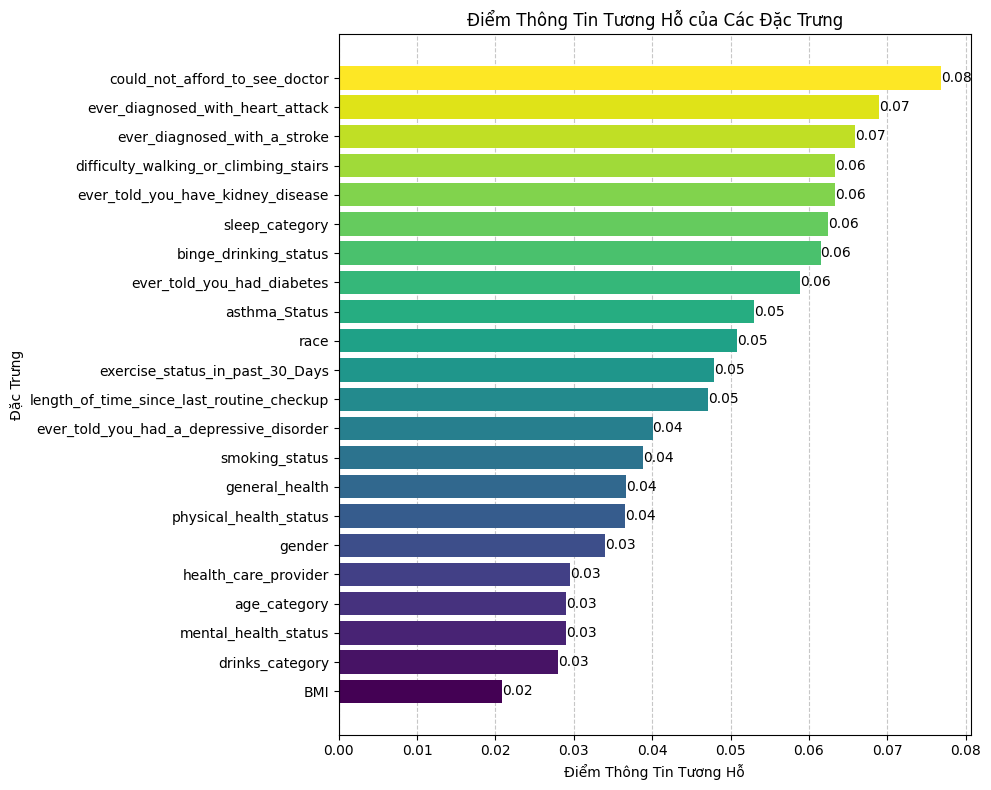

In [34]:
# Trực quan hóa điểm thông tin tương hỗ dưới dạng biểu đồ cột nằm ngang
plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(MI_score)))  # Màu sắc cho các cột
bars = plt.barh(MI_score.index, MI_score.values, color=colors)  # Vẽ biểu đồ cột nằm ngang

# Thêm các đường lưới phía sau các cột
plt.gca().set_axisbelow(True)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Thêm tiêu đề và nhãn cho trục
plt.title('Điểm Thông Tin Tương Hỗ của Các Đặc Trưng')  # Tiêu đề
plt.xlabel('Điểm Thông Tin Tương Hỗ')  # Nhãn trục X
plt.ylabel('Đặc Trưng')  # Nhãn trục Y

# Thêm nhãn dữ liệu cho các cột
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')

plt.tight_layout()  # Cải thiện bố cục
plt.show()  # Hi


#### **Giải Thích Các Điểm Thông Tin Tương Hỗ**<a id='Interpretation_of_Mutual_Information_Scores'></a>
[Contents](#Contents)

Thông tin tương hỗ đo lường sự phụ thuộc giữa các biến, giúp nhận diện cả mối quan hệ tuyến tính và phi tuyến. Trong bối cảnh này, điểm thông tin tương hỗ cho thấy mức độ thông tin mà mỗi đặc trưng cung cấp về biến mục tiêu **bệnh tim (heart_disease)**. Các điểm số cao cho thấy mối quan hệ mạnh mẽ giữa đặc trưng và biến mục tiêu.

### **Các Đặc Trưng Quan Trọng Với Điểm Thông Tin Tương Hỗ Cao**
- **could_not_afford_to_see_doctor (0.08):**
  
  Đặc trưng này có điểm thông tin tương hỗ cao nhất, cho thấy việc không thể chi trả để đi khám bác sĩ là yếu tố thông tin quan trọng nhất trong việc dự đoán bệnh tim. Điều này phản ánh một mối liên hệ đáng kể giữa rào cản tài chính trong việc chăm sóc sức khỏe và khả năng mắc bệnh tim.
  
- **ever_diagnosed_with_heart_attack (0.07):**
  
  Việc đã từng được chẩn đoán mắc bệnh tim là yếu tố thông tin rất quan trọng trong việc dự đoán bệnh tim. Đây là điều dễ hiểu, vì tiền sử mắc bệnh tim là một chỉ báo mạnh mẽ cho các vấn đề về sức khỏe tim mạch hiện tại.

- **ever_diagnosed_with_a_stroke (0.07):**
  
  Tương tự như bệnh tim, tiền sử bị đột quỵ cũng là yếu tố dự đoán mạnh mẽ bệnh tim, cho thấy rằng những người có tiền sử đột quỵ có khả năng mắc bệnh tim cao hơn.

- **difficulty_walking_or_climbing_stairs (0.06):**
  
  Khó khăn trong các hoạt động thể chất như đi bộ hoặc leo cầu thang có mối quan hệ chặt chẽ với bệnh tim, có thể phản ánh các giới hạn về thể chất do các vấn đề về sức khỏe tim mạch.

- **ever_told_you_have_kidney_disease (0.06):**
  
  Bệnh thận có mối liên hệ rõ rệt với bệnh tim, điều này phù hợp với các bệnh lý đi kèm giữa các vấn đề sức khỏe tim mạch và thận.

- **sleep_category (0.06):**
  
  Mẫu giấc ngủ hoặc chất lượng giấc ngủ cũng có mối quan hệ đáng chú ý với bệnh tim, cho thấy giấc ngủ kém có thể là một yếu tố nguy cơ.

- **binge_drinking_status (0.06):**
  
  Thói quen uống rượu quá mức là yếu tố thông tin khác, cho thấy mối quan hệ giữa hành vi tiêu thụ rượu và nguy cơ mắc bệnh tim.

- **ever_told_you_had_diabetes (0.06):**
  
  Bệnh tiểu đường là yếu tố nguy cơ đã được chứng minh đối với bệnh tim, và điểm thông tin tương hỗ cao của nó phản ánh sự liên kết mạnh mẽ này.

- **asthma_Status (0.05):**
  
  Sự có mặt của bệnh hen suyễn cũng cung cấp thông tin về khả năng mắc bệnh tim, có thể do các yếu tố nguy cơ chung hoặc bệnh đi kèm.

### **Các Đặc Trưng Có Điểm Thông Tin Tương Hỗ Vừa**
- **race (0.05), exercise_status_in_past_30_Days (0.05), length_of_time_since_last_routine_checkup (0.05):**

  Những đặc trưng này có điểm thông tin tương hỗ vừa phải, chỉ ra rằng chúng đóng góp thông tin hữu ích nhưng không mạnh mẽ cho việc dự đoán nguy cơ bệnh tim.

- **ever_told_you_had_a_depressive_disorder (0.04), smoking_status (0.04), general_health (0.04), physical_health_status (0.04):**

  Sức khỏe tinh thần, tình trạng hút thuốc, và sức khỏe thể chất nói chung cũng cho thấy các mối liên hệ có ý nghĩa với bệnh tim, phản ánh tính chất đa dạng của các yếu tố nguy cơ bệnh tim.

### **Các Đặc Trưng Có Điểm Thông Tin Tương Hỗ Thấp**
- **gender (0.03), health_care_provider (0.03), age_category (0.03), mental_health_status (0.03), drinks_category (0.03), BMI (0.02):**

  Những đặc trưng này có điểm thông tin tương hỗ thấp, cho thấy mặc dù chúng cung cấp một số thông tin, nhưng sự đóng góp của chúng vào việc dự đoán bệnh tim là tương đối nhỏ so với các đặc trưng hàng đầu.

### **Tóm Tắt**

Điểm thông tin tương hỗ cung cấp một thước đo định lượng về mức độ đóng góp của từng đặc trưng trong việc dự đoán bệnh tim. Các đặc trưng như rào cản tài chính trong chăm sóc sức khỏe, tiền sử mắc bệnh tim hoặc đột quỵ, và các hạn chế về thể chất có điểm số cao, làm nổi bật sự liên kết mạnh mẽ của chúng với bệnh tim. Hiểu được những mối quan hệ này sẽ giúp ưu tiên các đặc trưng cho việc phân tích tiếp theo và xây dựng các mô hình dự đoán bệnh tim hiệu quả hơn.

### **Hệ Số Tương Quan Pearson**<a id='Pearson_Correlation'></a>
[Contents](#Contents)

Hệ số tương quan Pearson, còn được gọi là hệ số tương quan r của Pearson, là một thước đo mối quan hệ tuyến tính giữa hai biến liên tục. Nó định lượng mức độ mà một cặp biến có mối quan hệ tuyến tính. Hệ số tương quan Pearson có thể nhận giá trị trong khoảng từ -1 đến 1, với các ý nghĩa như sau:

* **+1**: Mối quan hệ tuyến tính hoàn hảo dương (tăng cả hai biến đồng thời).
* **-1**: Mối quan hệ tuyến tính hoàn hảo âm (một biến tăng khi biến còn lại giảm).
* **0**: Không có mối quan hệ tuyến tính giữa hai biến.

Hệ số tương quan Pearson rất hữu ích khi cần kiểm tra và xác định các mối quan hệ tuyến tính giữa các đặc trưng trong dữ liệu. Tuy nhiên, nó chỉ phát hiện mối quan hệ tuyến tính và không thể phát hiện mối quan hệ phi tuyến.

In [35]:
# Kết hợp X_cbe (các đặc trưng đã mã hóa) và y (mục tiêu) vào một DataFrame mới
encoded_df = X_cbe.copy()
encoded_df['heart_disease'] = y

# Tính toán hệ số tương quan Pearson giữa các đặc trưng
corr = encoded_df.corr()

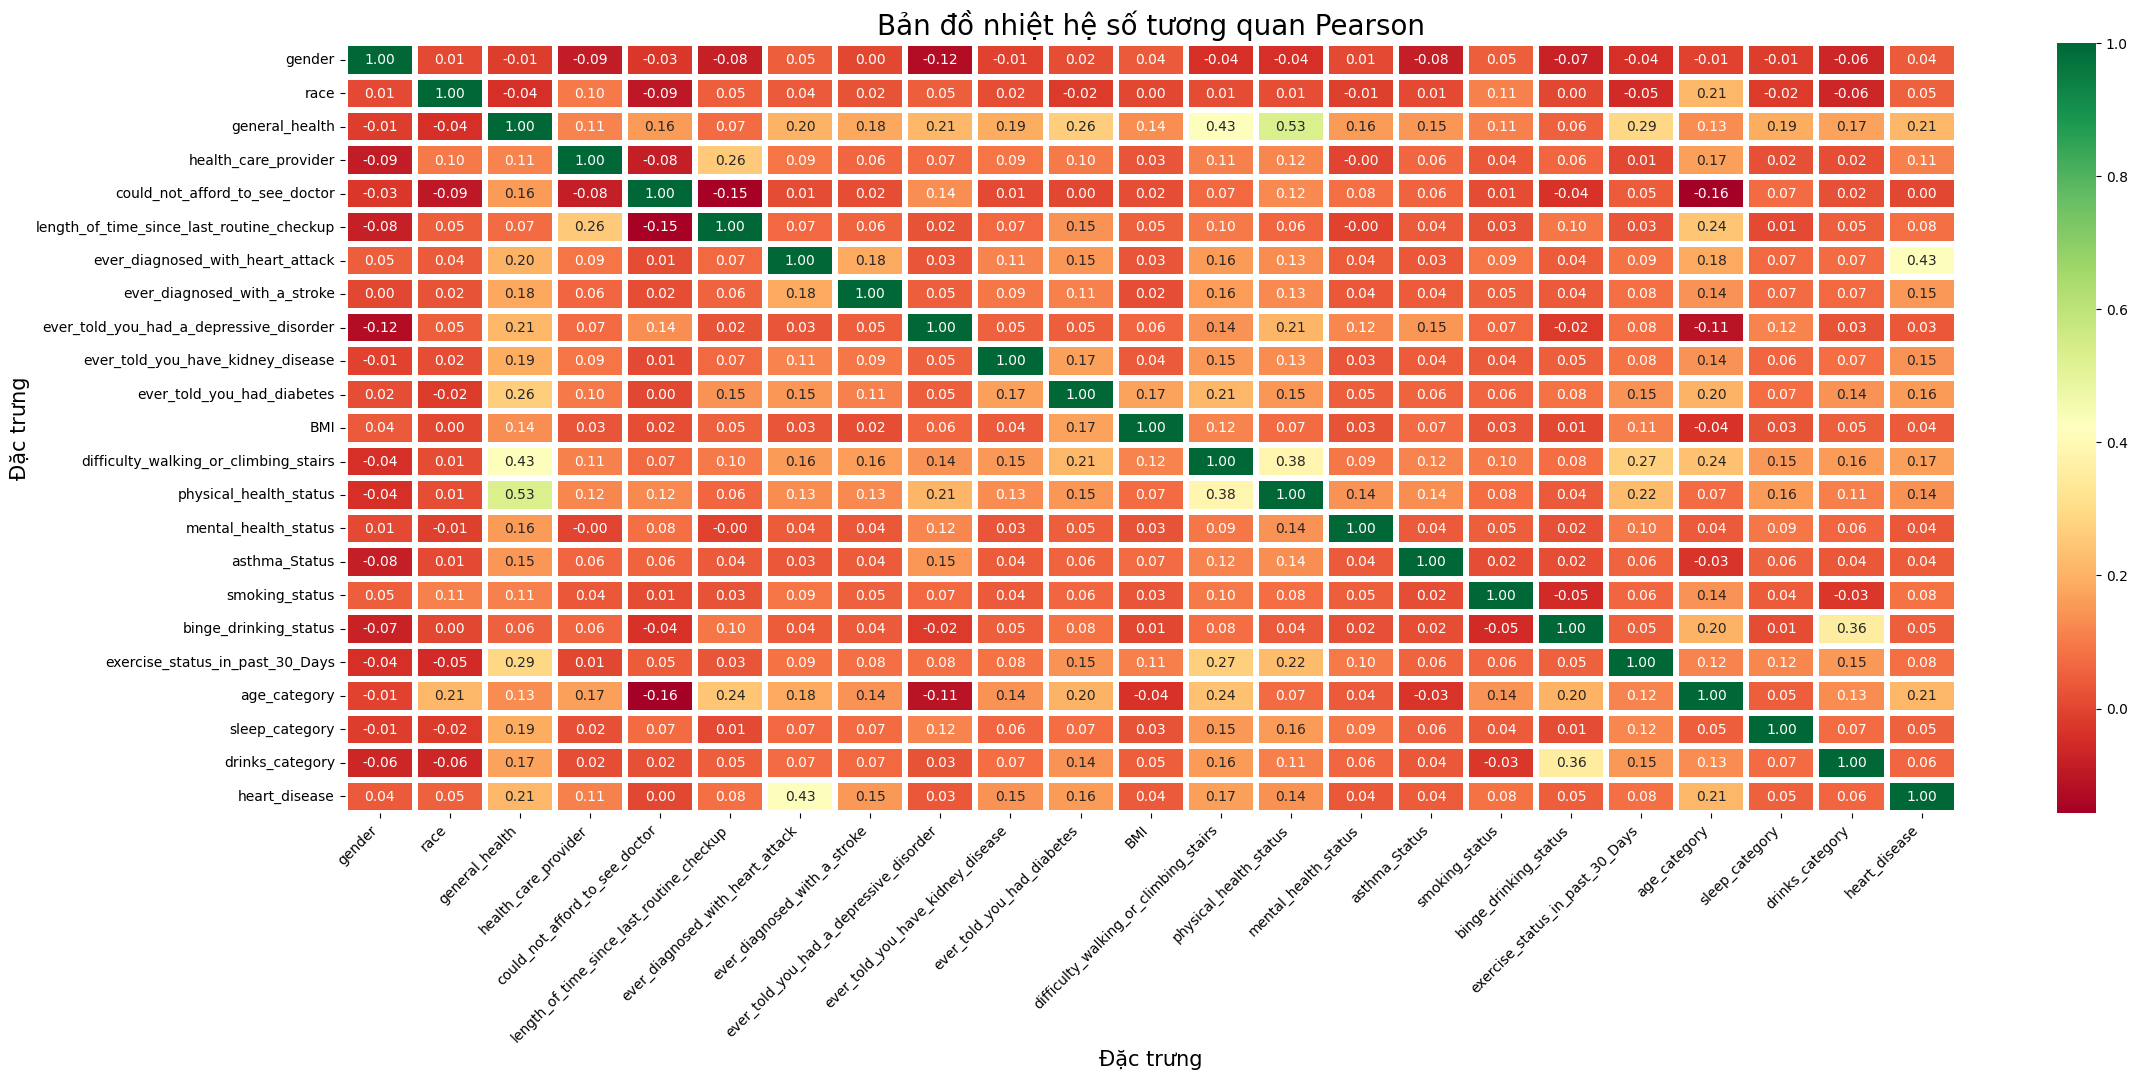

In [38]:
# Vẽ bản đồ nhiệt hệ số tương quan Pearson
plt.figure(figsize=(26, 10))
sns.heatmap(corr, linewidths=4, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title('Bản đồ nhiệt hệ số tương quan Pearson', fontsize=20)
plt.xlabel('Đặc trưng', fontsize=15)
plt.ylabel('Đặc trưng', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### **Collinearity Interpretation** 

#### **Mối Quan Hệ Collinearity Cao**
- **General Health và Physical Health Status (0.53)**: Có sự tương quan mạnh mẽ giữa sức khỏe tổng quát và tình trạng sức khỏe thể chất. Điều này cho thấy rằng hai đặc trưng này có mối quan hệ chặt chẽ, với sức khỏe tổng thể tốt có liên quan mạnh mẽ đến tình trạng thể chất tốt.
- **Difficulty Walking or Climbing Stairs và Physical Health Status (0.43)**: Sự tương quan mạnh cho thấy khó khăn trong các hoạt động thể chất là một yếu tố quan trọng trong tình trạng sức khỏe thể chất tổng thể.
- **General Health và Difficulty Walking or Climbing Stairs (0.29)**: Sự tương quan mức độ vừa phải cho thấy sức khỏe tổng quát bị ảnh hưởng đáng kể bởi khả năng thực hiện các hoạt động thể chất.
- **Ever Told You Had Diabetes và General Health (0.26)**: Mối quan hệ mức độ vừa phải cho thấy tình trạng mắc bệnh tiểu đường là một yếu tố quan trọng trong sức khỏe tổng quát.
- **Ever Told You Had Diabetes và Physical Health Status (0.26)**: Sự tương quan mức độ vừa phải cho thấy bệnh tiểu đường có tác động đáng kể đến tình trạng sức khỏe thể chất.
- **Length of Time Since Last Routine Checkup và General Health (0.26)**: Sự tương quan mức độ vừa phải cho thấy việc kiểm tra sức khỏe định kỳ có liên quan đến việc theo dõi sức khỏe tổng thể.
- **General Health và Exercise Status in Past 30 Days (0.29)**: Sự tương quan mức độ vừa phải cho thấy việc tập thể dục là một yếu tố quan trọng trong việc duy trì sức khỏe tổng thể.

#### **Mối Quan Hệ Collinearity Mức Độ Vừa Phải**
- **Ever Diagnosed with Heart Attack và Ever Diagnosed with a Stroke (0.18)**: Mối quan hệ mức độ vừa phải cho thấy các bệnh này thường xảy ra cùng nhau.
- **Ever Told You Had Diabetes và Ever Diagnosed with Heart Attack (0.20)**: Sự tương quan mức độ vừa phải cho thấy bệnh tiểu đường là một yếu tố đồng mắc với bệnh tim.
- **Ever Diagnosed with a Stroke và Ever Diagnosed with Heart Attack (0.18)**: Sự tương quan mức độ vừa phải cho thấy các yếu tố nguy cơ chung.
- **Ever Told You Have Kidney Disease và Ever Told You Had Diabetes (0.19)**: Mối quan hệ mức độ vừa phải cho thấy các bệnh lý đồng mắc chung.
- **Ever Diagnosed with Heart Attack và Ever Told You Had Kidney Disease (0.15)**: Mối quan hệ mức độ vừa phải cho thấy sự liên kết giữa bệnh thận và bệnh tim.
- **Health Care Provider và General Health (0.26)**: Sự tương quan mức độ vừa phải cho thấy việc có một nhà cung cấp dịch vụ chăm sóc sức khỏe có liên quan đến sức khỏe tổng thể.
- **Health Care Provider và Could Not Afford to See Doctor (0.16)**: Sự tương quan mức độ vừa phải cho thấy rào cản tài chính đối với chăm sóc sức khỏe ảnh hưởng đến sức khỏe tổng thể.
- **Smoking Status và Binge Drinking Status (0.11)**: Sự tương quan yếu cho thấy một số yếu tố lối sống có liên quan với nhau.

#### **Tổng Quan**
Collinearity giúp chúng ta nhận diện các mối quan hệ mạnh mẽ hoặc vừa phải giữa các đặc trưng trong bộ dữ liệu. Các mối quan hệ này có thể ảnh hưởng đến khả năng dự đoán của mô hình học máy, đặc biệt là khi các đặc trưng có mối tương quan cao có thể gây ra hiện tượng đa cộng tuyến (multicollinearity). Điều này có thể làm giảm độ chính xác của mô hình và cần được xử lý thông qua các phương pháp như giảm số lượng đặc trưng, sử dụng các kỹ thuật regularization, hoặc kết hợp các đặc trưng tương quan cao.

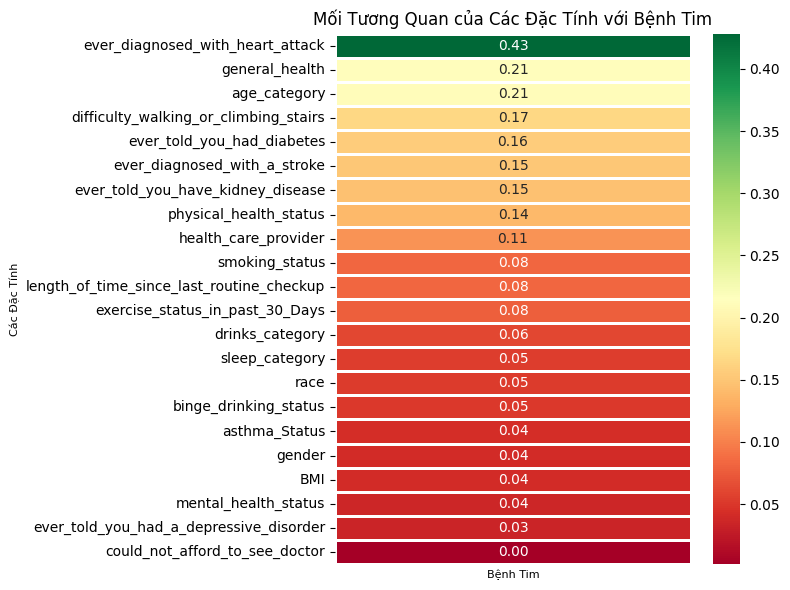

In [39]:
# Trích xuất các mối tương quan với biến mục tiêu:
correlation_with_target = corr[['heart_disease']].drop(index='heart_disease').sort_values(by='heart_disease', ascending=False)

# Trực quan hóa mối tương quan với biến mục tiêu bằng một biểu đồ nhiệt:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, fmt=".2f", cmap="RdYlGn", cbar=True, linewidths=2)
plt.title('Mối Tương Quan của Các Đặc Tính với Bệnh Tim', fontsize=12)  # Tiêu đề biểu đồ
plt.xlabel('Bệnh Tim', fontsize=8)  # Nhãn trục x
plt.ylabel('Các Đặc Tính', fontsize=8)  # Nhãn trục y
plt.xticks(rotation=45, ha='right')  # Xoay nhãn trục x 45 độ
plt.xticks(ticks=[], labels=[], rotation=45, ha='right')  # Loại bỏ nhãn trục x cũ
plt.yticks(rotation=0)  # Không xoay nhãn trục y
plt.tight_layout()  # Tự động điều chỉnh bố cục
plt.show()  # Hiển thị biểu đồ


#### **Target Variable Interpretation**<a id='Target_Variable_Interpretation'></a>
[Contents](#Contents)

Dưới đây là bản dịch cho phần giải thích về mối tương quan Pearson giữa các đặc tính và bệnh tim trong biểu đồ nhiệt:

---

**Giải thích Mối Tương Quan Pearson**

Biểu đồ nhiệt hiển thị các hệ số tương quan Pearson giữa các đặc tính và biến mục tiêu "heart_disease" (bệnh tim). Các giá trị tương quan có thể dao động từ `-1` đến `1`, với các giá trị gần `1` biểu thị mối tương quan dương mạnh, các giá trị gần `-1` biểu thị mối tương quan âm mạnh, và các giá trị gần `0` biểu thị không có mối tương quan tuyến tính. Dưới đây là những quan sát chính:

### **Mối Tương Quan Tuyến Tính Dương Mạnh Nhất**
* **"Ever Diagnosed with Heart Attack" (0.43):**
  - **Giải thích:** Đây là đặc tính có mối tương quan tuyến tính dương mạnh nhất với bệnh tim, cho thấy rằng những người đã từng bị đau tim có khả năng cao mắc bệnh tim. Điều này phù hợp với kiến thức y tế rằng tiền sử đau tim là một yếu tố nguy cơ lớn đối với bệnh tim.

### **Mối Tương Quan Tuyến Tính Dương Vừa Phải**
* **"General Health" (0.21):**
  - **Giải thích:** Có mối tương quan tuyến tính dương vừa phải giữa sức khỏe tổng quát và bệnh tim. Sức khỏe tổng quát kém liên quan đến khả năng cao mắc bệnh tim.
* **"Age Category" (0.21):**
  - **Giải thích:** Nhóm tuổi có mối tương quan tuyến tính dương vừa phải với bệnh tim, cho thấy rằng những người lớn tuổi có khả năng mắc bệnh tim cao hơn.
* **"Difficulty Walking or Climbing Stairs" (0.17):**
  - **Giải thích:** Đây là đặc tính cho thấy rằng những người gặp khó khăn với các hoạt động thể chất có khả năng cao mắc bệnh tim.
* **"Ever Told You Had Diabetes" (0.16):**
  - **Giải thích:** Mối tương quan tuyến tính dương vừa phải cho thấy những người mắc tiểu đường có khả năng cao mắc bệnh tim.
* **"Ever Diagnosed with a Stroke" (0.15):**
  - **Giải thích:** Có mối tương quan tuyến tính dương vừa phải, cho thấy rằng những người đã từng bị đột quỵ cũng có nguy cơ cao mắc bệnh tim.
* **"Ever Told You Have Kidney Disease" (0.15):**
  - **Giải thích:** Mối tương quan tuyến tính dương vừa phải cho thấy có mối liên hệ giữa bệnh thận và bệnh tim.
* **"Physical Health Status" (0.14):**
  - **Giải thích:** Những người có tình trạng sức khỏe thể chất kém có khả năng cao mắc bệnh tim.

### **Mối Tương Quan Tuyến Tính Dương Yếu**
* **"Health Care Provider" (0.11):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu cho thấy một mối liên hệ giữa việc có nhà cung cấp dịch vụ y tế và bệnh tim, có thể do tần suất chẩn đoán bệnh tim cao hơn.
* **"Smoking Status" (0.08):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu cho thấy có một mối liên hệ giữa hút thuốc và bệnh tim, phản ánh nguy cơ mắc các bệnh tim mạch do hút thuốc.
* **"Length of Time Since Last Routine Checkup" (0.08):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu cho thấy khoảng thời gian dài giữa các lần kiểm tra có thể liên quan đến bệnh tim.
* **"Exercise Status in Past 30 Days" (0.08):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu cho thấy ít tập thể dục có thể liên quan đến bệnh tim.
* **"Drinks Category" (0.06):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu giữa tình trạng uống rượu và bệnh tim.
* **"Sleep Category" (0.05):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu cho thấy giấc ngủ kém có thể liên quan đến bệnh tim.
* **"Race" (0.05):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu chỉ ra sự liên kết nhẹ giữa dân tộc và bệnh tim.
* **"Binge Drinking Status" (0.05):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu giữa tình trạng uống rượu say và bệnh tim.
* **"Asthma Status" (0.04):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu giữa tình trạng hen suyễn và bệnh tim.
* **"Gender" (0.04):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu giữa giới tính và bệnh tim.
* **"BMI" (0.04):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu giữa chỉ số BMI và bệnh tim.
* **"Mental Health Status" (0.04):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu giữa tình trạng sức khỏe tâm thần và bệnh tim.
* **"Ever Told You Had a Depressive Disorder" (0.03):**
  - **Giải thích:** Mối tương quan tuyến tính dương yếu cho thấy một mối liên hệ nhẹ giữa trầm cảm và bệnh tim.
* **"Could Not Afford to See Doctor" (0.00):**
  - **Giải thích:** Đặc tính này có mối tương quan tuyến tính không đáng kể với bệnh tim, cho thấy rằng những rào cản tài chính đối với chăm sóc y tế không có mối tương quan tuyến tính trực tiếp đáng kể với bệnh tim trong bộ dữ liệu này.

### **Tóm Tắt**
Biểu đồ nhiệt cho thấy yếu tố tiên đoán mạnh nhất đối với bệnh tim là tiền sử bị đau tim, tiếp theo là sức khỏe tổng quát, nhóm tuổi và khó khăn với các hoạt động thể chất. Các đặc tính khác có mối tương quan tuyến tính yếu hơn, cho thấy chúng có mối liên hệ ít trực tiếp nhưng vẫn đáng chú ý với bệnh tim. Những thông tin này có thể hữu ích trong việc xác định các yếu tố nguy cơ và hướng dẫn các phân tích và mô hình hóa tiếp theo.

### **So Sánh Giữa Mối Tương Quan Pearson và Thông Tin Tương Hỗ**<a id='Comparison_Between_Pearson_Correlation_and_Mutual_Information'></a>
[Contents](#Contents)

**So Sánh**
* **Mối Quan Hệ Tuyến Tính**: Mối tương quan Pearson hiệu quả trong việc nhận diện các mối quan hệ tuyến tính. "Ever Diagnosed with Heart Attack" (Đã từng được chẩn đoán bị đau tim) có mối tương quan tuyến tính cao nhất với bệnh tim, chỉ ra một sự phụ thuộc tuyến tính trực tiếp.
* **Mối Quan Hệ Phi Tuyến Tính**: Thông tin tương hỗ (Mutual Information) bắt được cả các mối quan hệ tuyến tính và phi tuyến. "Could Not Afford to See Doctor" (Không đủ tiền để gặp bác sĩ) có điểm số cao nhất, cho thấy rằng các rào cản tài chính, mặc dù không có mối tương quan tuyến tính mạnh, nhưng lại có tác động đáng kể đến dự đoán bệnh tim.
* **Sự Trùng Lặp**: Một số đặc tính như "Ever Diagnosed with Heart Attack" và "General Health" (Sức khỏe tổng quát) là quan trọng cả trong mối tương quan Pearson và thông tin tương hỗ, cho thấy sức mạnh dự đoán tổng thể của chúng.
* **Những Quan Sát Độc Đáo**: Thông tin tương hỗ làm nổi bật những đặc tính như "Could Not Afford to See Doctor" và "Sleep Category" (Tình trạng giấc ngủ) mà mối tương quan Pearson không nhấn mạnh, cho thấy những đặc tính này có mối quan hệ phi tuyến với bệnh tim.

**Kết Luận**
* Mối tương quan Pearson hữu ích trong việc nhận diện các mối quan hệ tuyến tính mạnh nhưng có thể bỏ qua các sự phụ thuộc phi tuyến.
* Thông tin tương hỗ cung cấp một cái nhìn toàn diện hơn bằng cách nắm bắt cả mối quan hệ tuyến tính và phi tuyến, làm nổi bật những đặc tính có thể không rõ ràng với mối tương quan Pearson.
* Việc sử dụng cả hai phương pháp mang đến một sự hiểu biết toàn diện về các mối quan hệ giữa các đặc tính độc lập và biến mục tiêu, giúp lựa chọn đặc tính tốt hơn cho mô hình dự đoán.